In [97]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
import warnings
from sklearn import datasets

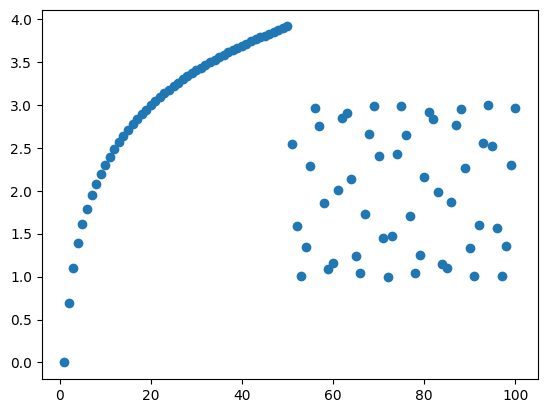

In [98]:
X = np.array([ x for x in range(1,101)])
y = np.array([(math.log(x)) for x in X[:50]] + [math.cos(x) + 2 for x in X[:50]])
training_X = np.vstack((X, y)).T
labels = [1] * 50 + [0] *50

plt.scatter(X, y)
plt.show()                  

Linear

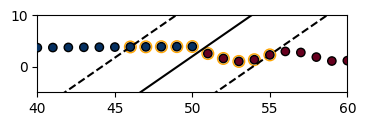

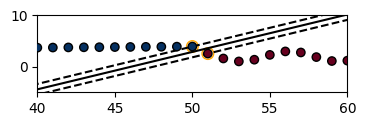

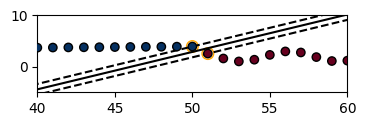

In [99]:
warnings.filterwarnings("ignore")
cnt = 1

for penalty in [0.01, 1, 100]:

    clf_model = svm.SVC(kernel="linear", C=penalty)
    clf_model.fit(training_X, labels)

    weight_vector = clf_model.coef_[0]
    slope_parameter = -weight_vector[0] / weight_vector[1]
    x_values = np.linspace(min(training_X[:,0]) - 1, max(training_X[:,0])+1 , 1000)
    y_values = slope_parameter * x_values - (clf_model.intercept_[0]) / weight_vector[1]

    separation_margin  = 1 / np.sqrt(np.sum(clf_model.coef_**2))
    yy_up = y_values + np.sqrt(1 + slope_parameter**2) * separation_margin 
    yy_down = y_values - np.sqrt(1 + slope_parameter**2) * separation_margin 

    plt.figure(cnt, figsize=(4, 1))
    plt.clf()
    plt.plot(x_values, yy_up, "k--")
    plt.plot(x_values, yy_down, "k--")
    plt.plot(x_values, y_values, "k-")
    plt.ylim(-5,10)
    plt.xlim(40,60)

    plt.scatter(
        clf_model.support_vectors_[:, 0],
        clf_model.support_vectors_[:, 1],
        s=70,
        facecolors="none",
        edgecolors="orange",
    )
    plt.scatter(
        training_X[:, 0], training_X[:, 1], c=labels, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    cnt = cnt + 1

plt.show()

In [100]:
def non_linear_model(name , samples , noise):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    circle_X, circle_y = datasets.make_circles(n_samples=samples, noise=noise)

    axes[0].scatter(circle_X[:, 0], circle_X[:, 1], c=['red' if label == 0 else 'green' for label in circle_y], marker='.')
    axes[0].set_title('Original Data')

    for idx, penalty_value in enumerate([0.01,1, 100]):
        clf = svm.SVC(kernel=name, C=penalty_value)
        clf.fit(circle_X, circle_y)

        axes[idx + 1].scatter(circle_X[:, 0], circle_X[:, 1], c=['red' if label == 0 else 'green' for label in circle_y], s=50)

        xlim = axes[idx + 1].get_xlim()
        ylim = axes[idx + 1].get_ylim()

        x_vals = np.linspace(xlim[0], xlim[1], 30)
        y_vals = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y_vals, x_vals)

        xy = np.vstack([X.ravel(), Y.ravel()]).T
        decision_values = clf.decision_function(xy).reshape(X.shape)

        axes[idx + 1].contour(X, Y, decision_values, levels=[0], alpha=0.5, linestyles=['-'])
        axes[idx + 1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=70, lw=1, facecolors='none')
        axes[idx + 1].set_title(f'Decision Boundary (C={penalty_value}) , (Noise={noise})')

    fig.suptitle(name, fontsize=48)
    plt.tight_layout()
    plt.show()    

In [101]:
def non_linear_model3(name, samples, noise):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    x_vals = np.linspace(-2, 2, samples)
    function1_y = x_vals**3 + np.random.normal(0, noise, samples)
    function2_y = np.sin(x_vals) + np.random.normal(0, noise, samples) + 3 

    synthetic_X = np.vstack((np.column_stack((x_vals, function1_y)), np.column_stack((x_vals, function2_y))))
    synthetic_y = np.concatenate((np.zeros(samples), np.ones(samples)))

    axes[0].scatter(synthetic_X[:, 0], synthetic_X[:, 1], c=['red' if label == 0 else 'green' for label in synthetic_y], marker='.')
    axes[0].set_title('Original Data')

    for idx, penalty_value in enumerate([0.01, 1, 100]):
        clf = svm.SVC(kernel=name, C=penalty_value)
        clf.fit(synthetic_X, synthetic_y)

        axes[idx + 1].scatter(synthetic_X[:, 0], synthetic_X[:, 1], c=['red' if label == 0 else 'green' for label in synthetic_y], s=50)

        xlim = axes[idx + 1].get_xlim()
        ylim = axes[idx + 1].get_ylim()

        x_vals = np.linspace(xlim[0], xlim[1], 30)
        y_vals = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y_vals, x_vals)

        xy = np.vstack([X.ravel(), Y.ravel()]).T
        decision_values = clf.decision_function(xy).reshape(X.shape)

        axes[idx + 1].contour(X, Y, decision_values, levels=[0], alpha=0.5, linestyles=['-'])

        axes[idx + 1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=25, lw=1, facecolors='none')
        axes[idx + 1].set_title(f'Decision Boundary (C={penalty_value}) , (Noise={noise})')

    fig.suptitle(name, fontsize=48)
    plt.tight_layout()
    plt.show()


In [102]:
def non_linear_model2(name, samples, noise):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    
    moon_X, moon_y = datasets.make_moons(n_samples=samples, noise=noise)

    axes[0].scatter(moon_X[:, 0], moon_X[:, 1], c=['red' if label == 0 else 'green' for label in moon_y], marker='.')
    axes[0].set_title('Original Data')

    for idx, penalty_value in enumerate([0.01, 1 , 100]):
        clf = svm.SVC(kernel=name, C=penalty_value)
        clf.fit(moon_X, moon_y)

        axes[idx + 1].scatter(moon_X[:, 0], moon_X[:, 1], c=['red' if label == 0 else 'green' for label in moon_y], s=50)

        xlim = axes[idx + 1].get_xlim()
        ylim = axes[idx + 1].get_ylim()

        x_vals = np.linspace(xlim[0], xlim[1], 30)
        y_vals = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y_vals, x_vals)

        xy = np.vstack([X.ravel(), Y.ravel()]).T
        decision_values = clf.decision_function(xy).reshape(X.shape)

        axes[idx + 1].contour(X, Y, decision_values, levels=[0], alpha=0.5, linestyles=['-'])

        axes[idx + 1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=25, lw=1, facecolors='none')
        axes[idx + 1].set_title(f'Decision Boundary (C={penalty_value}) , (Noise={noise})')

    fig.suptitle(name, fontsize=48)
    plt.tight_layout()
    plt.show()

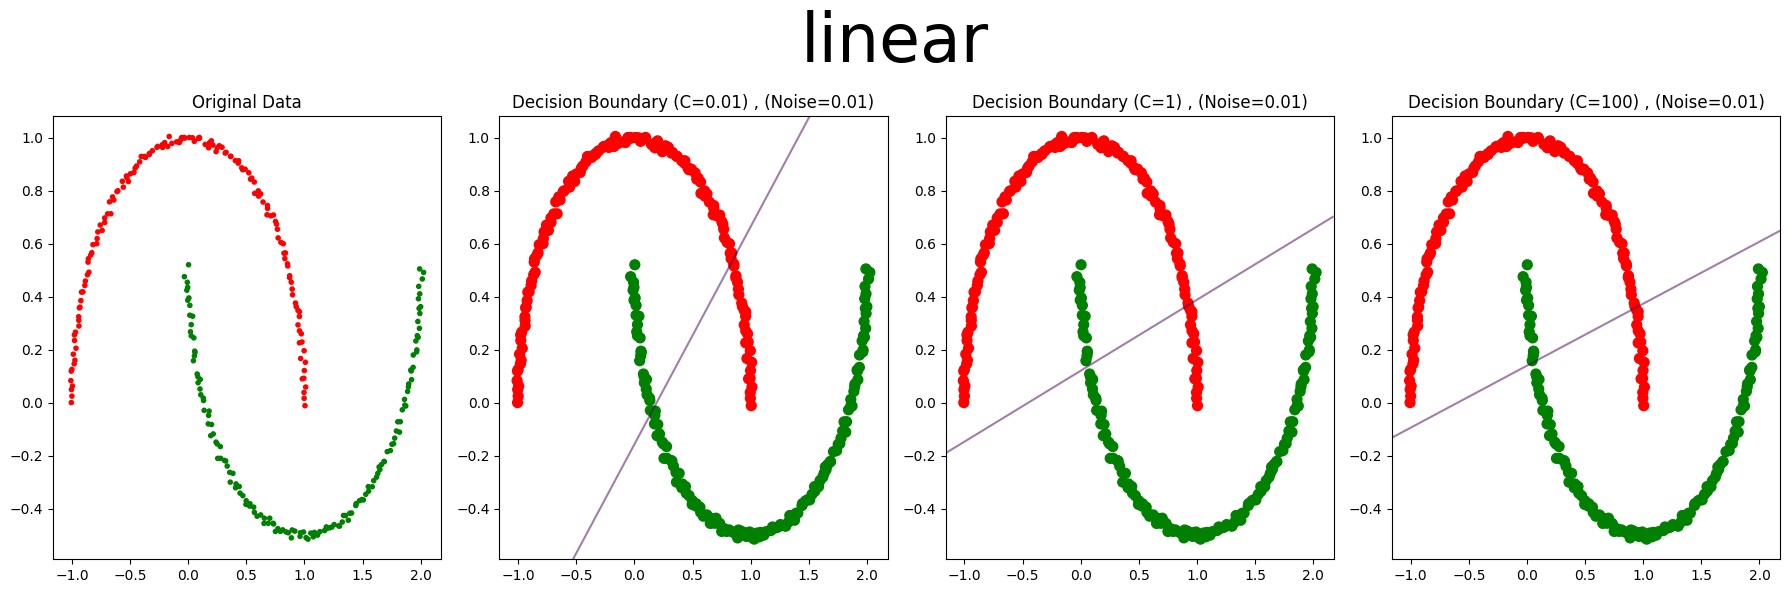

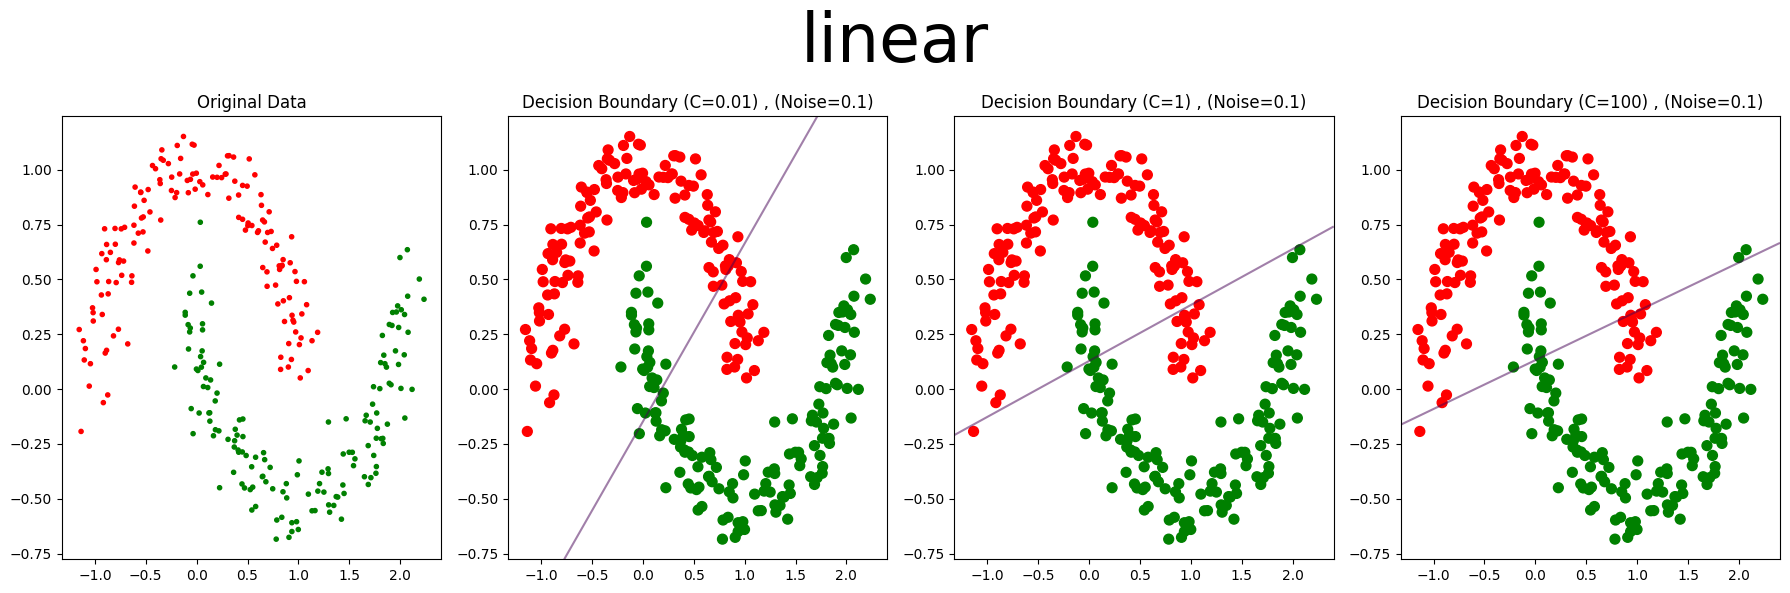

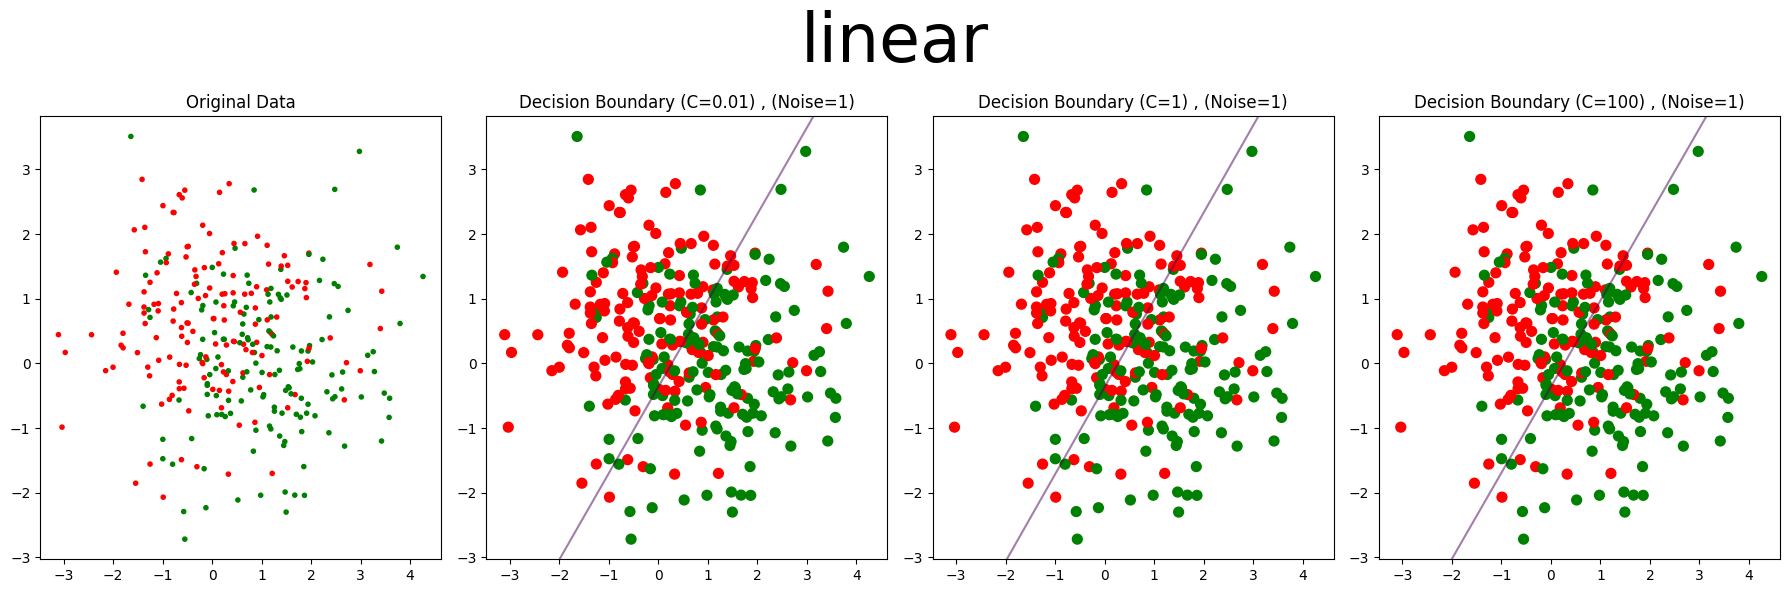

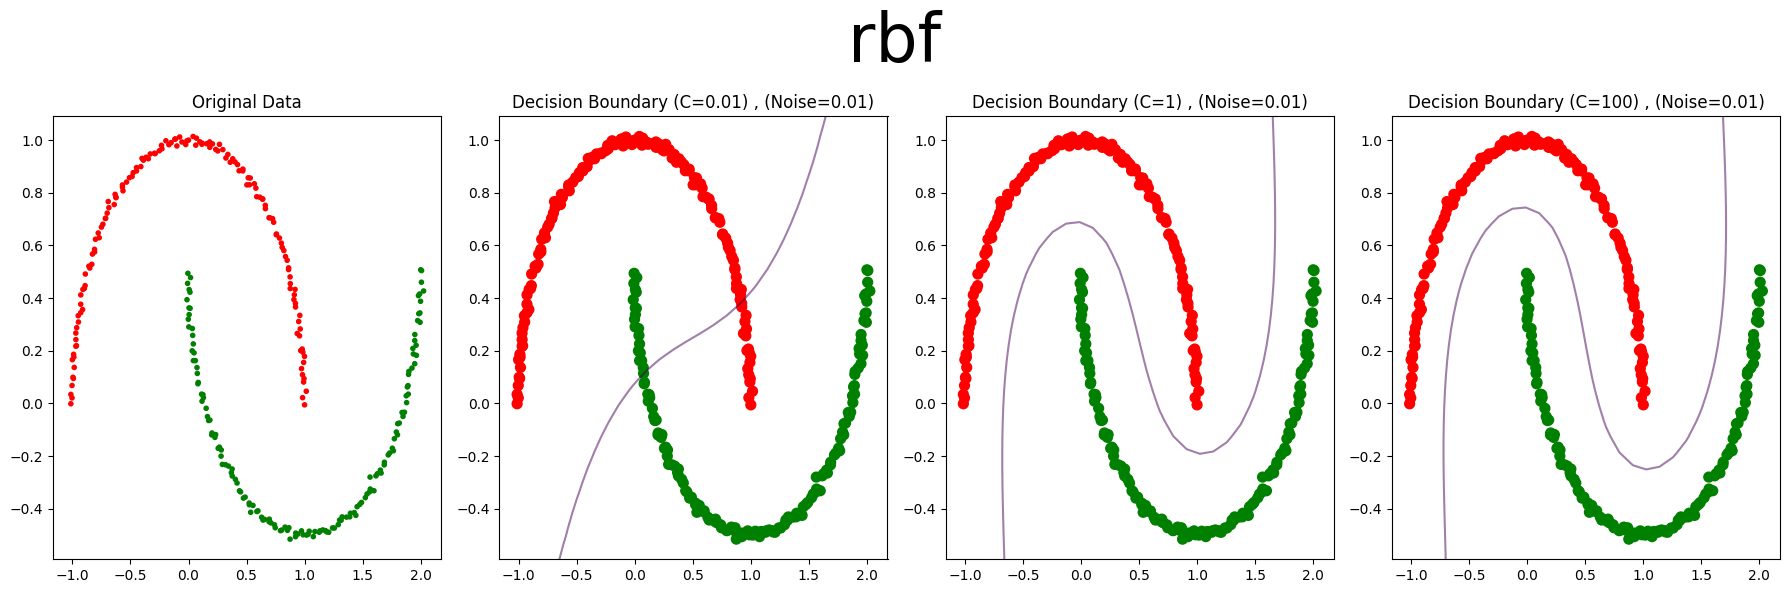

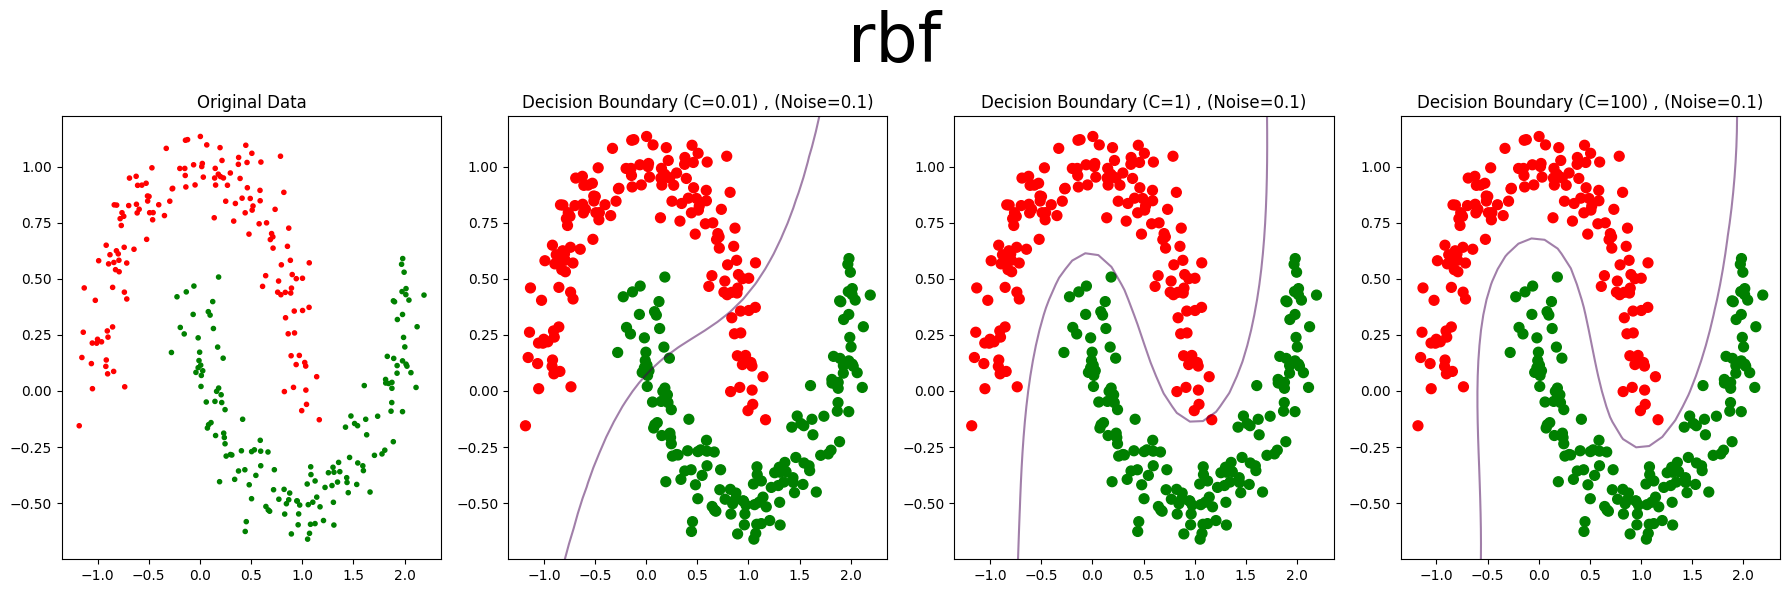

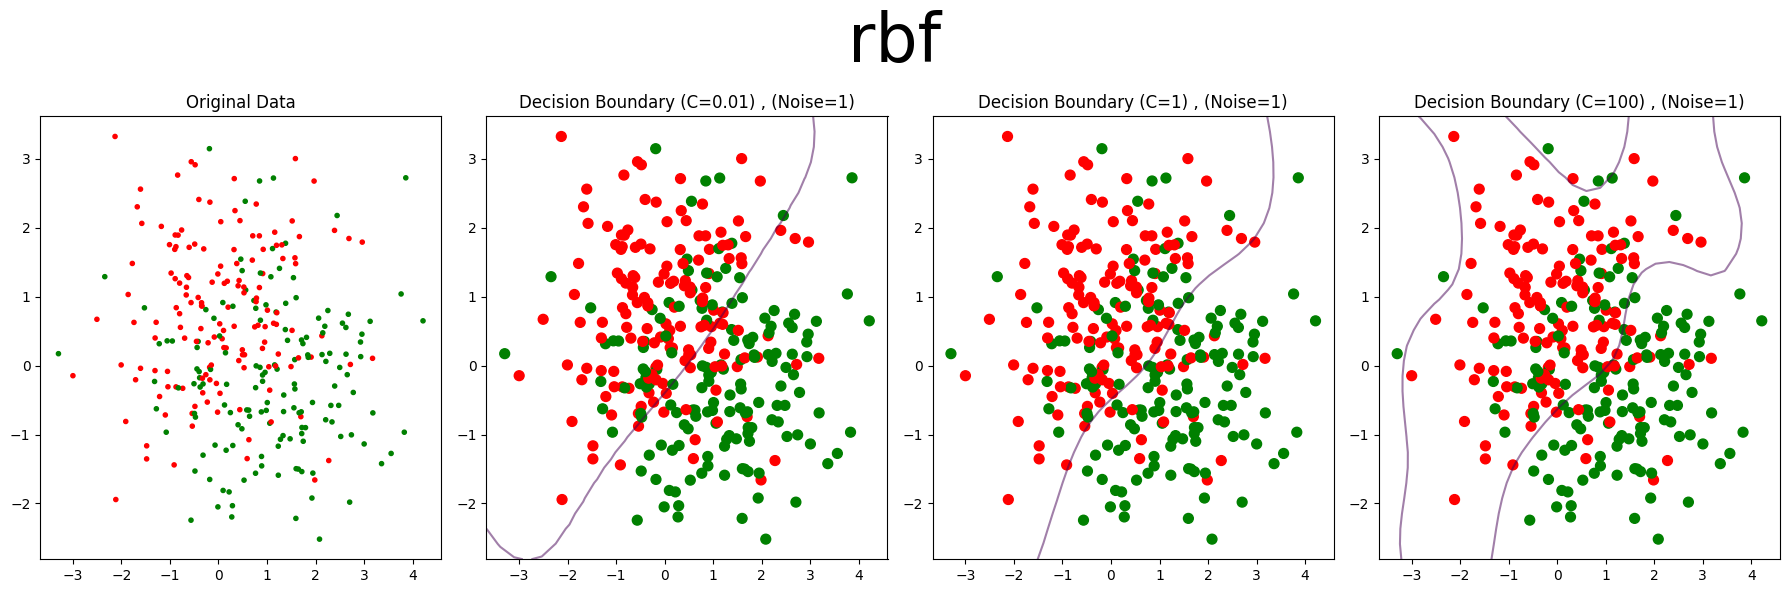

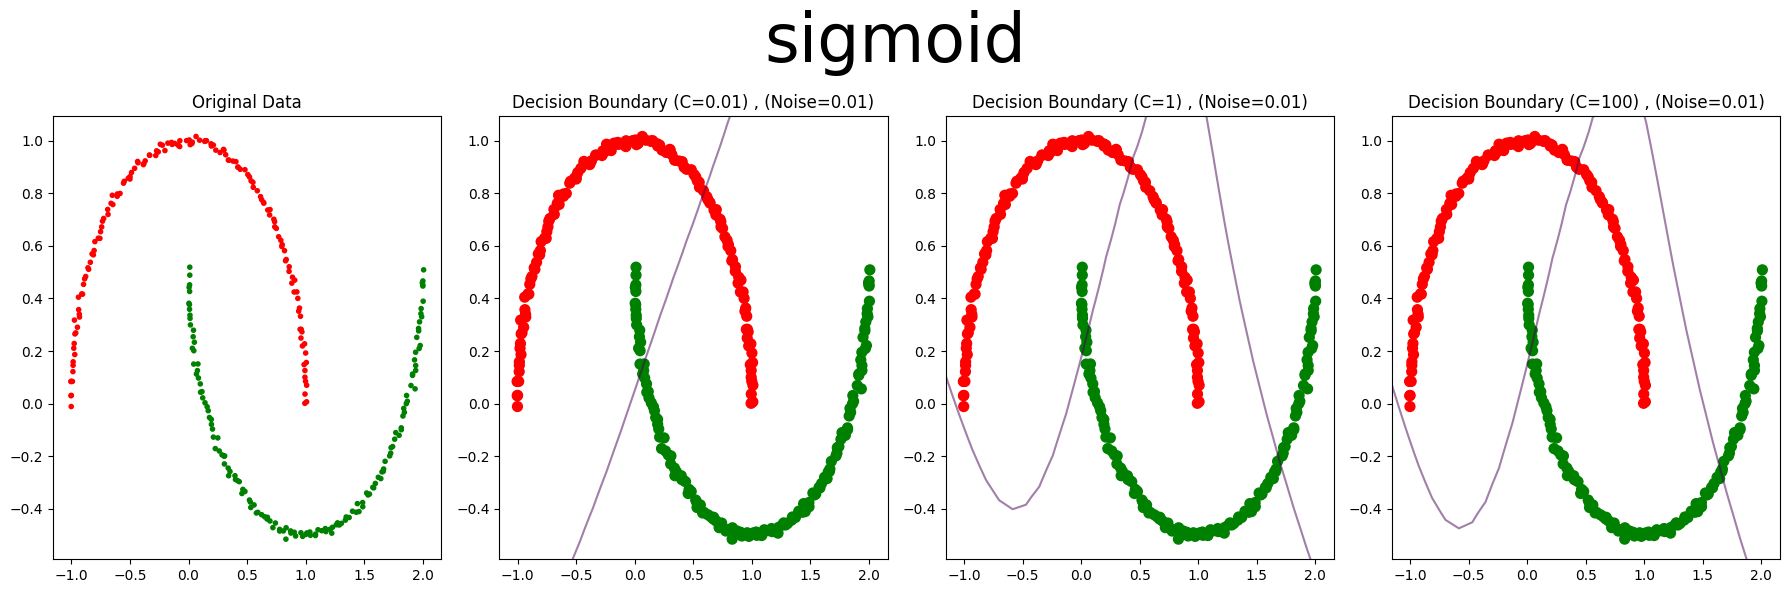

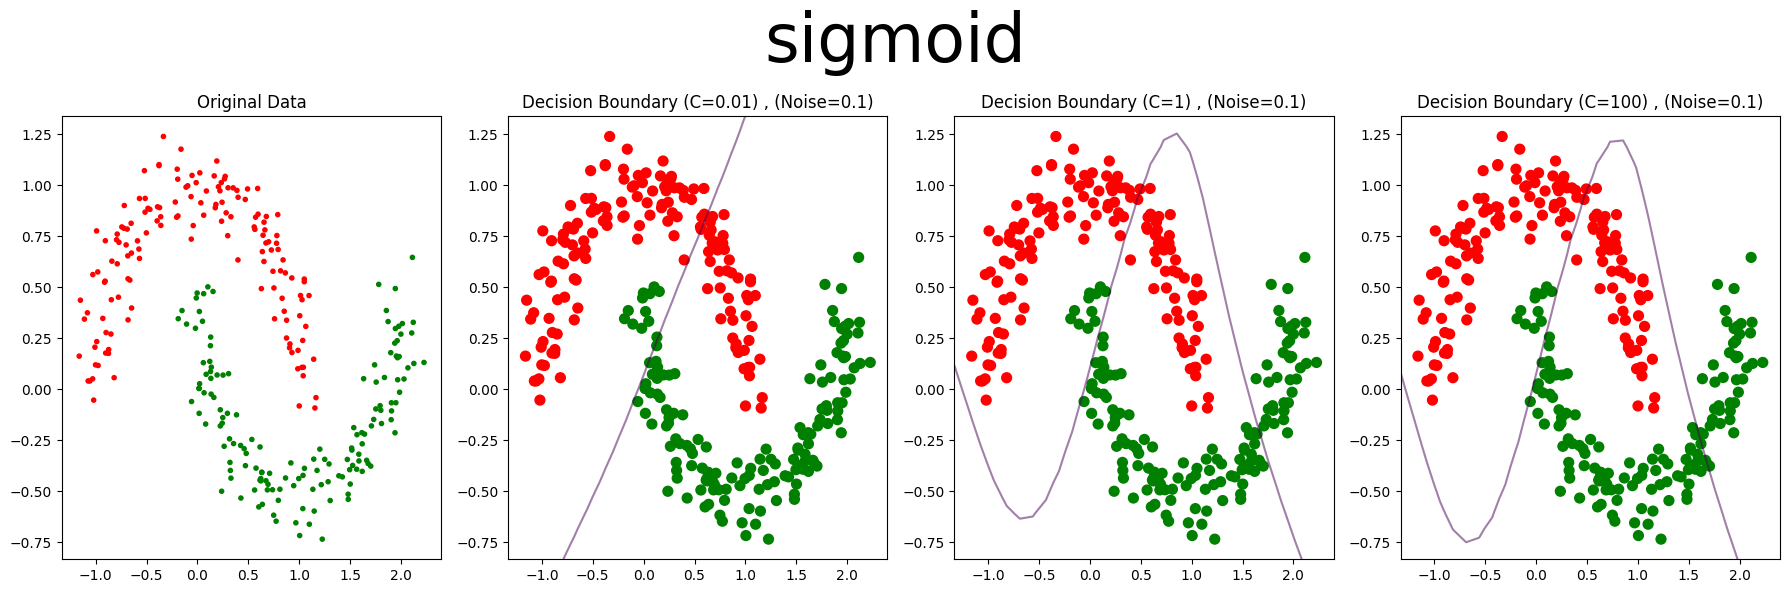

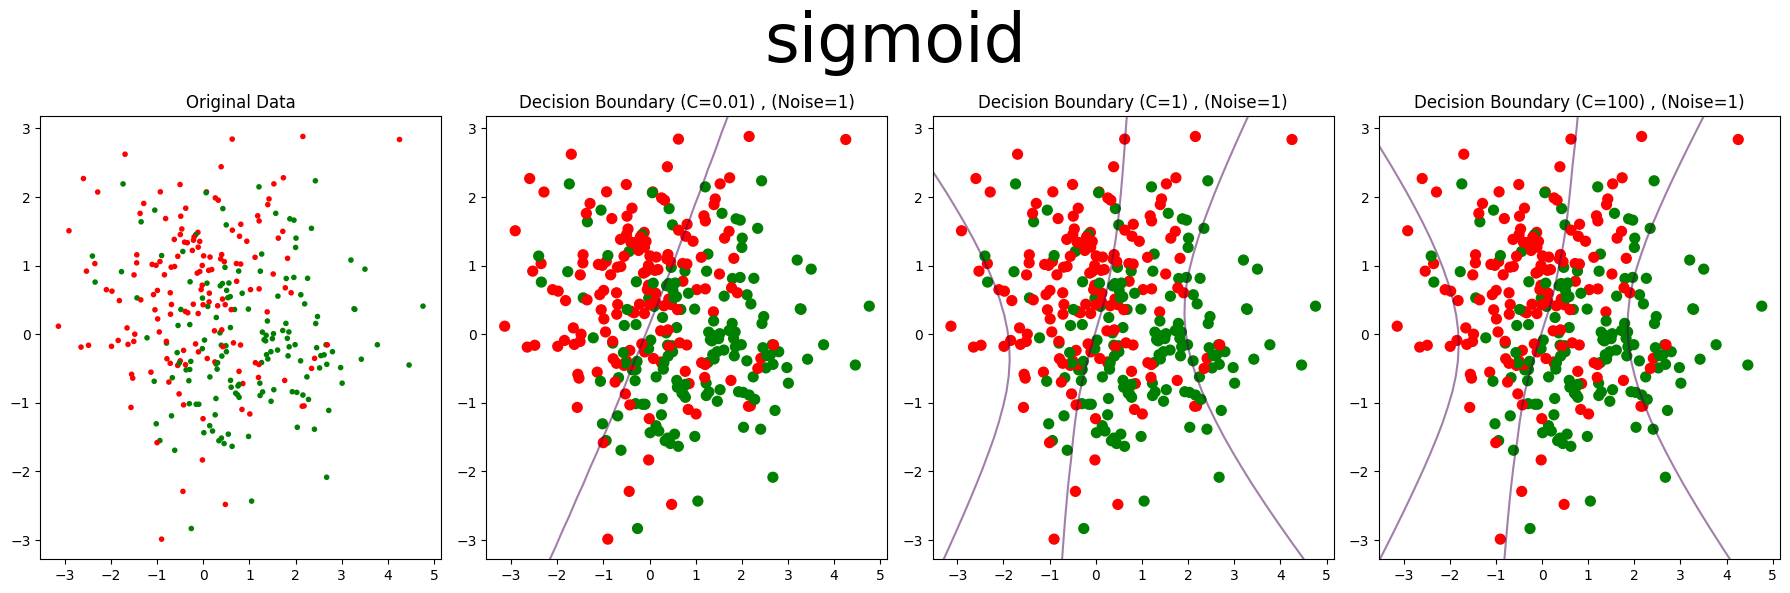

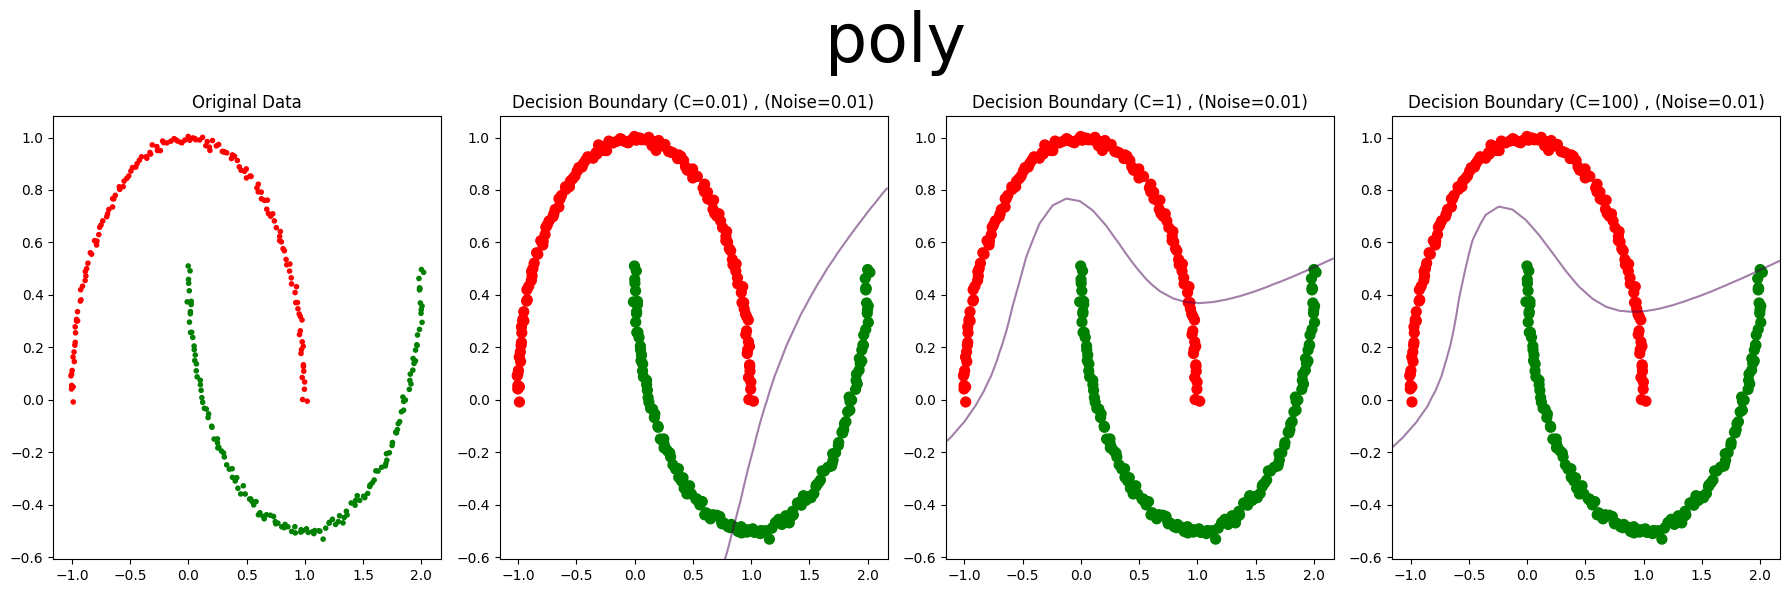

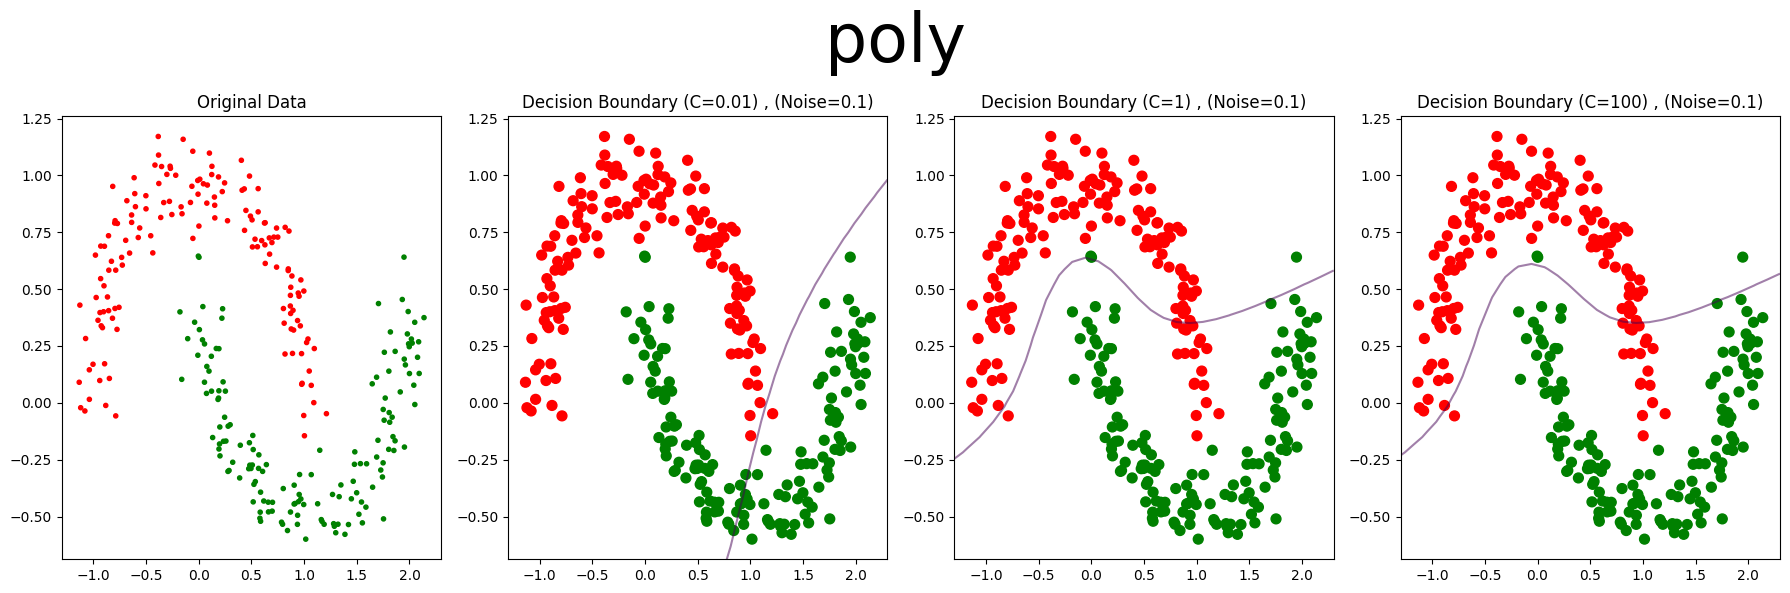

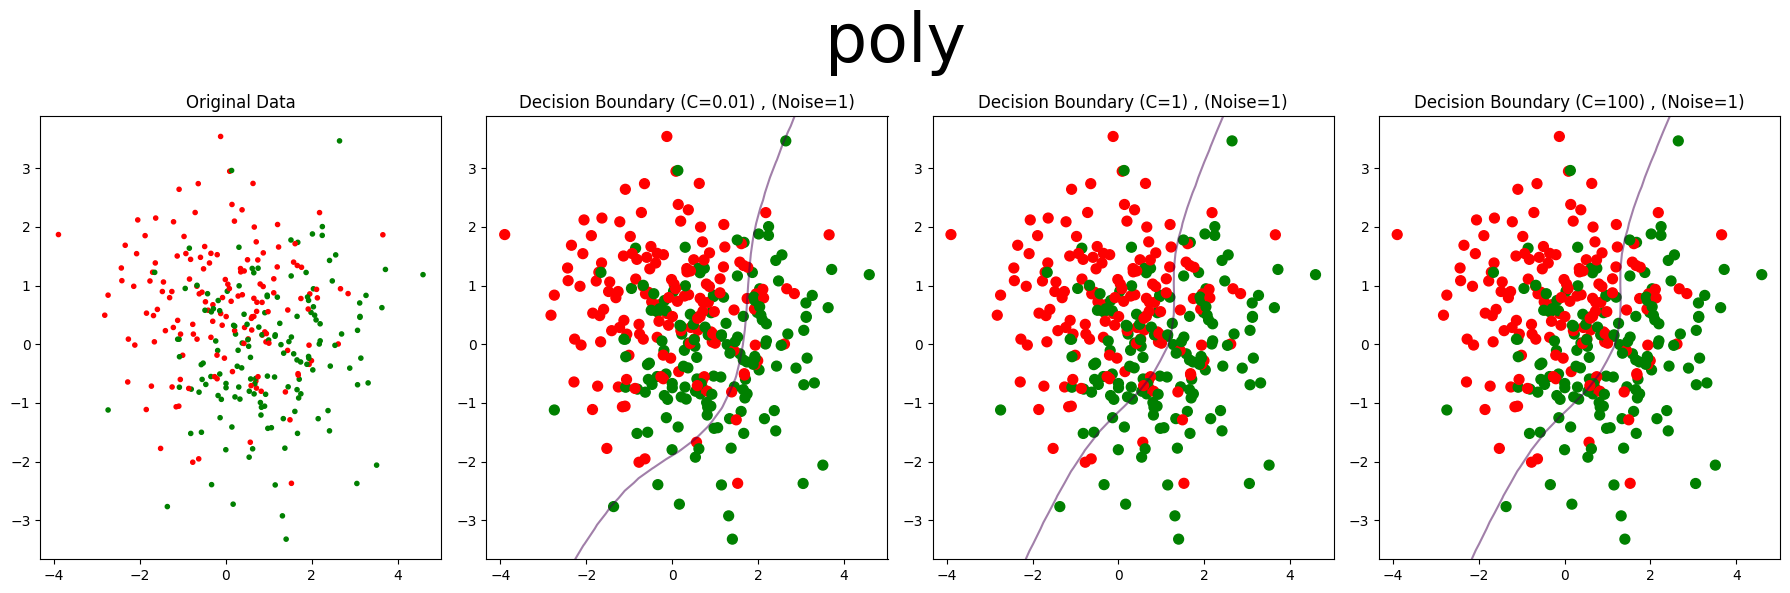

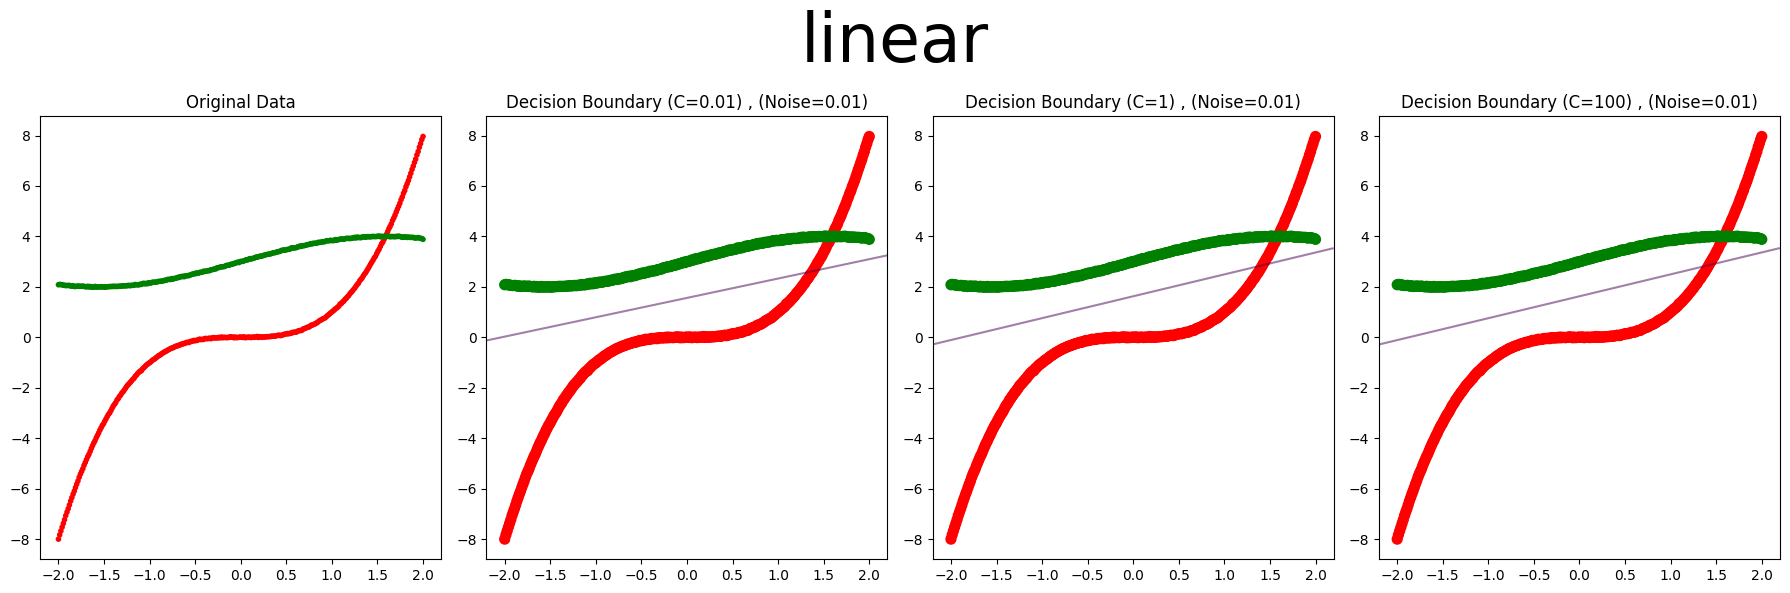

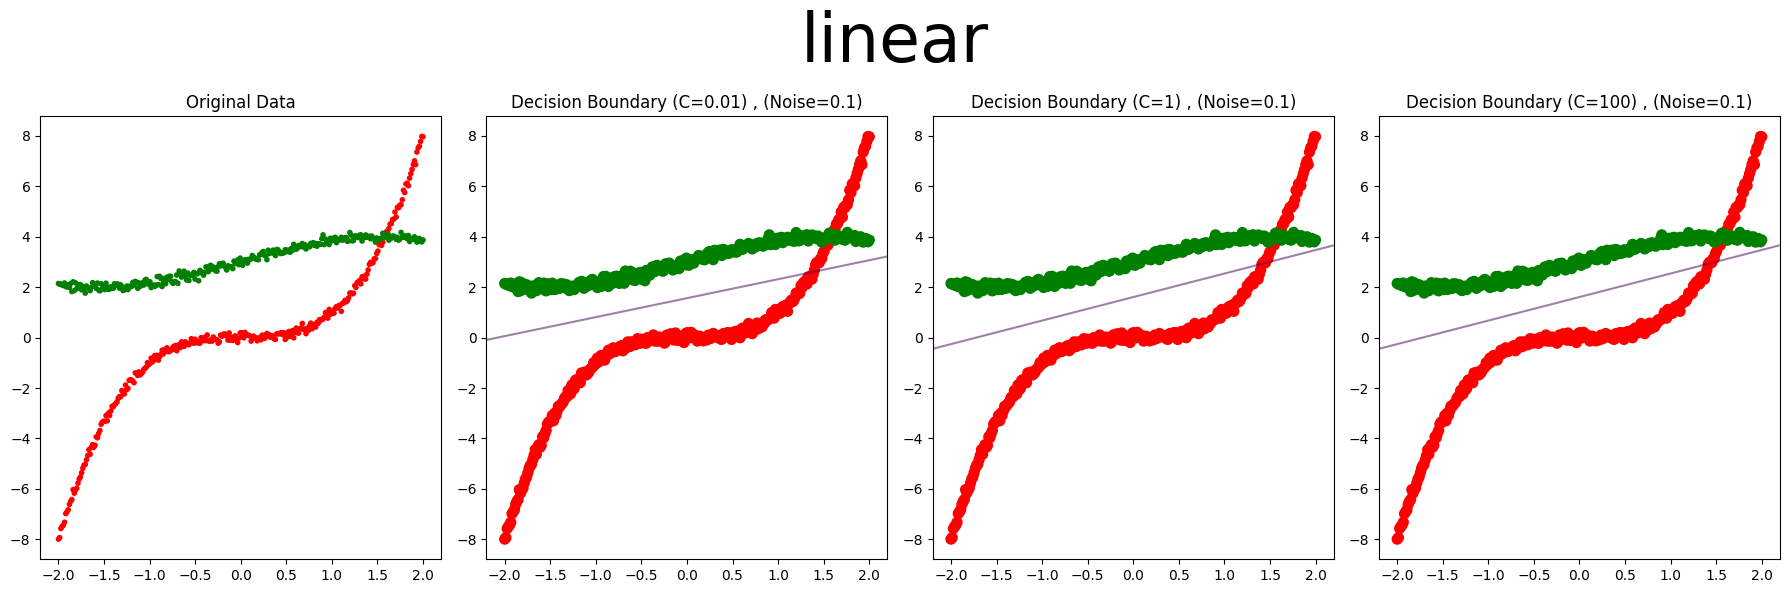

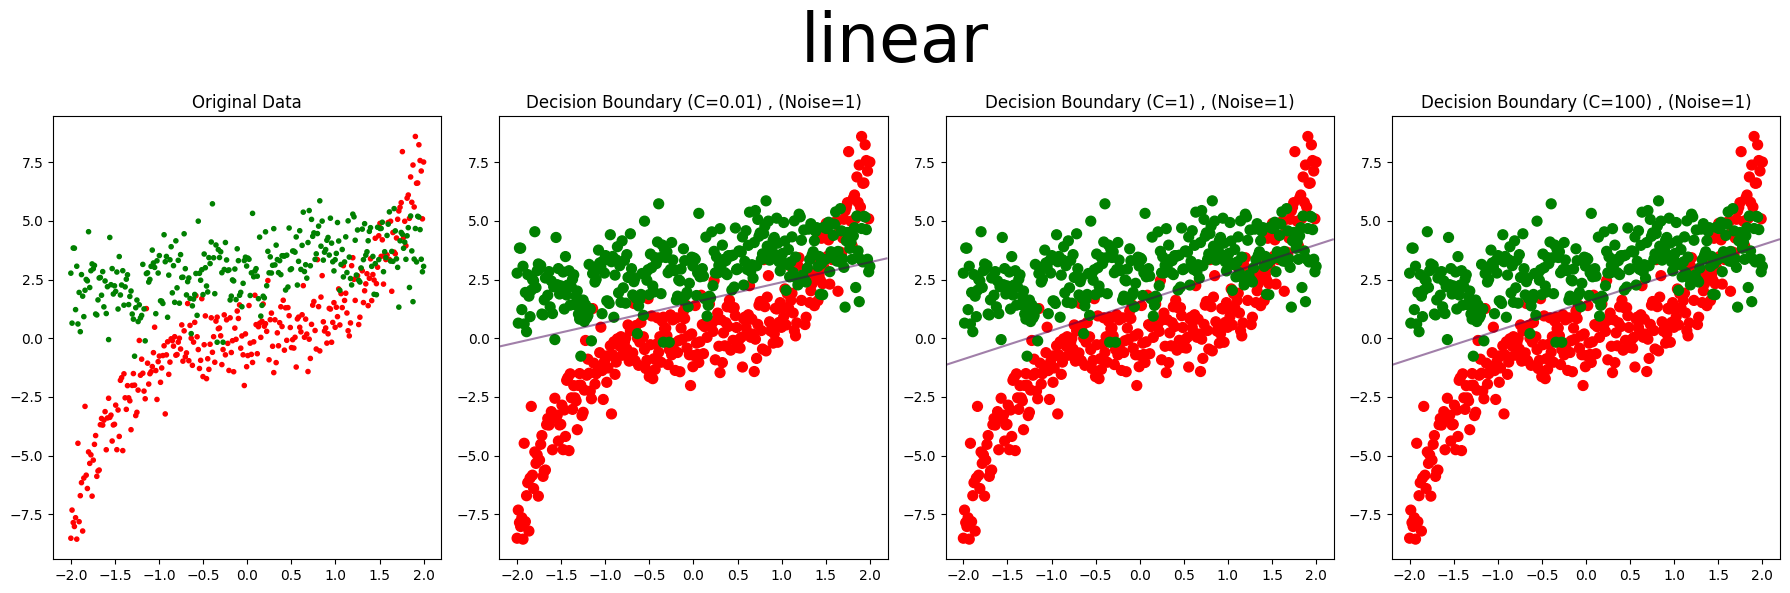

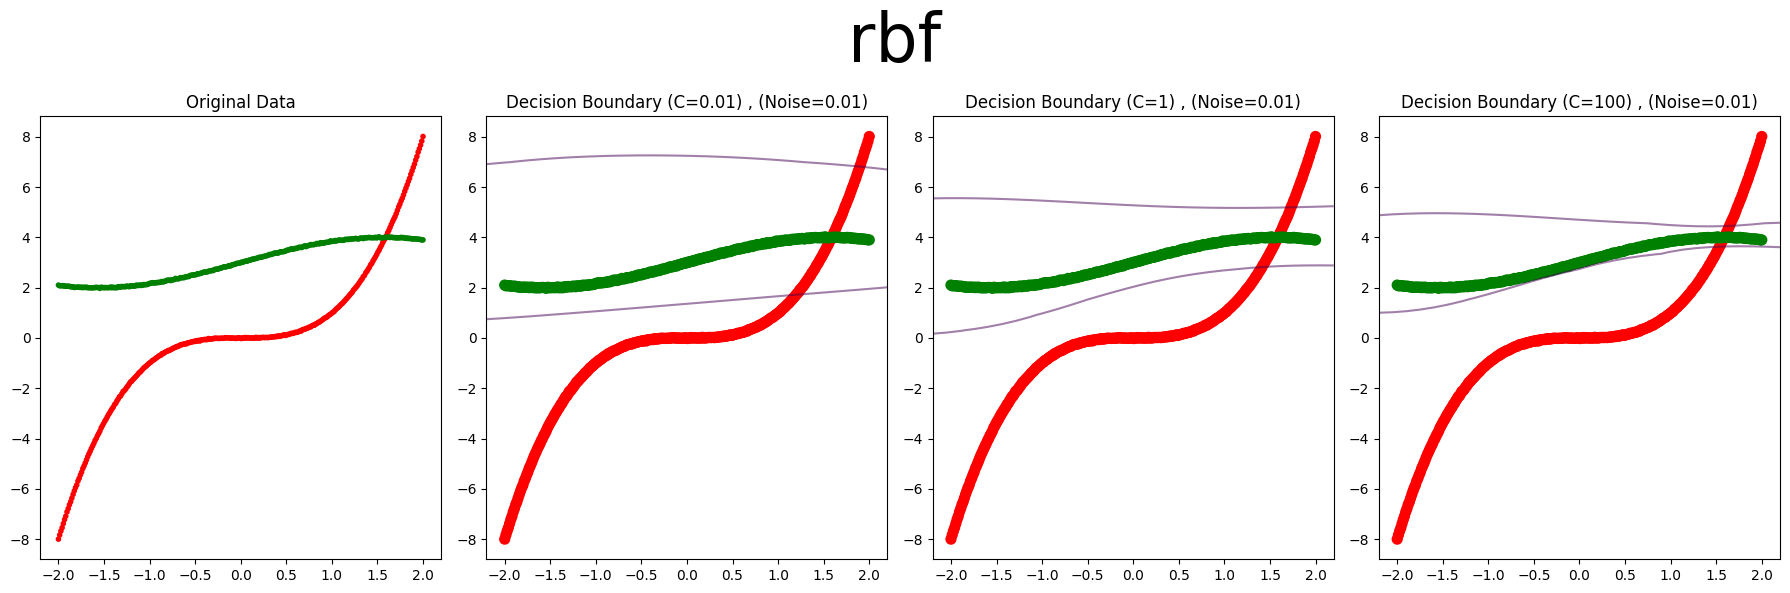

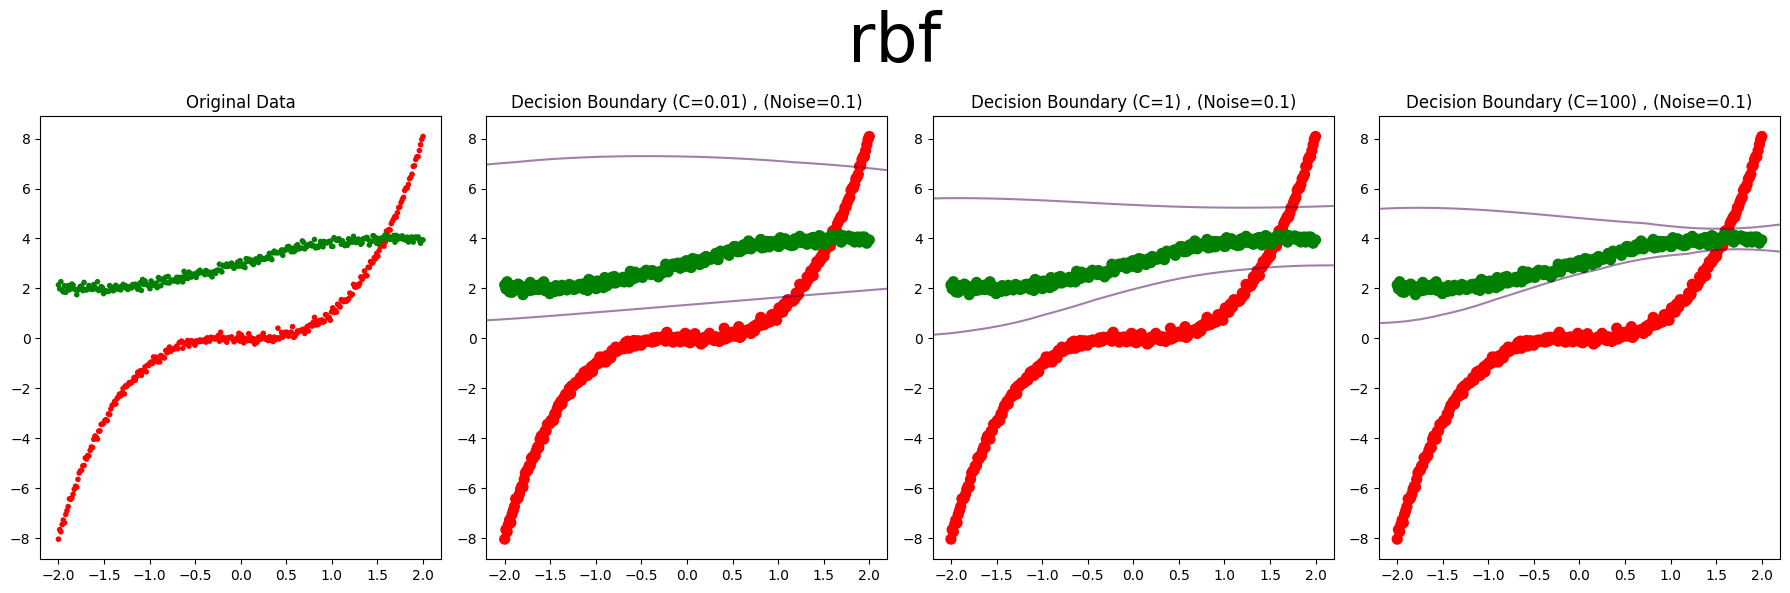

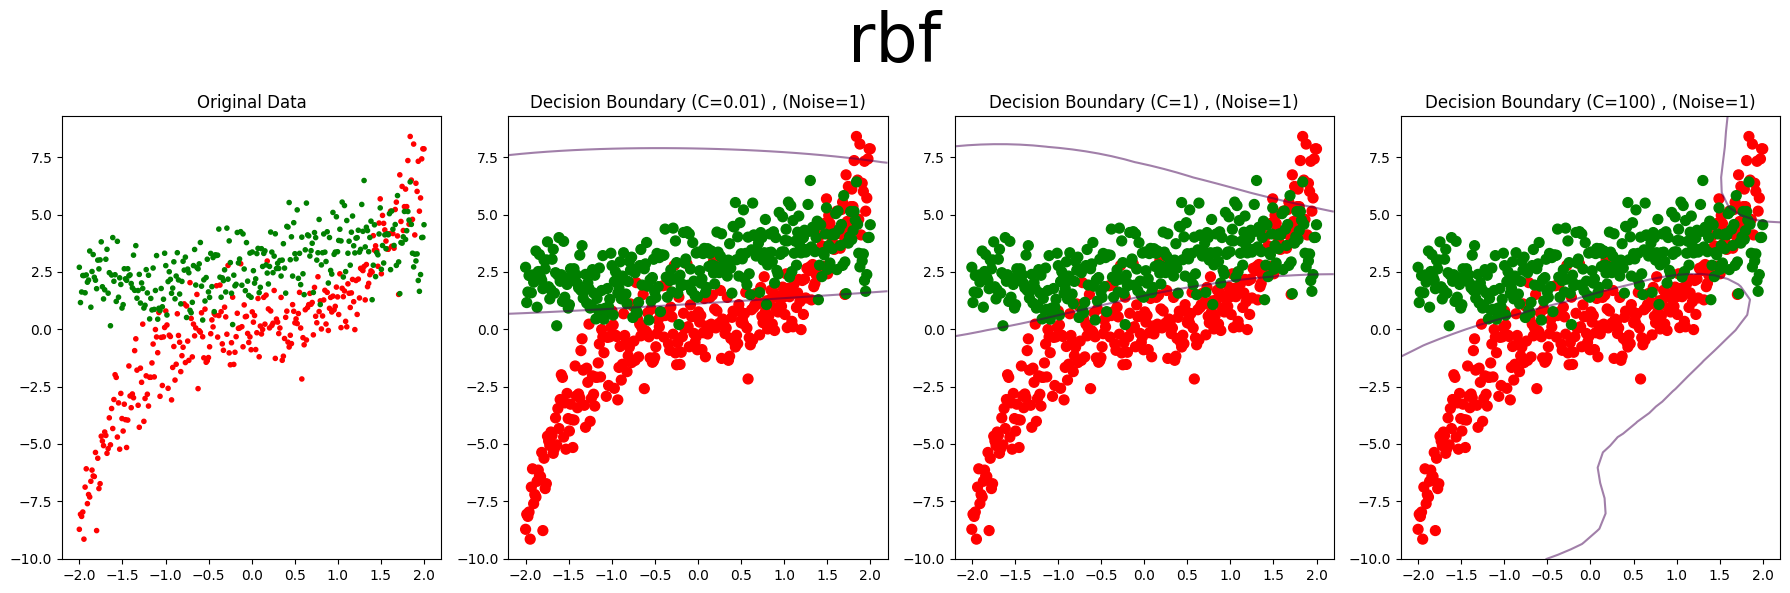

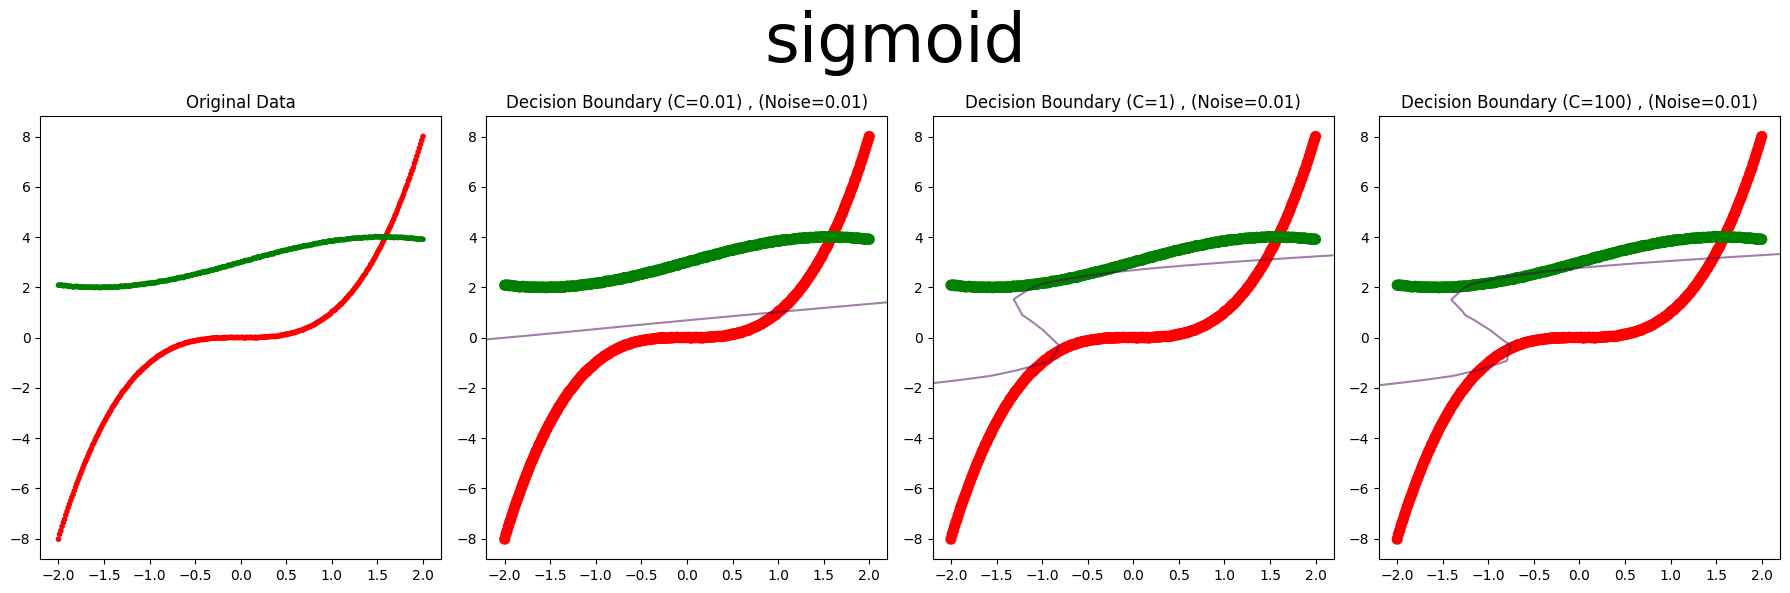

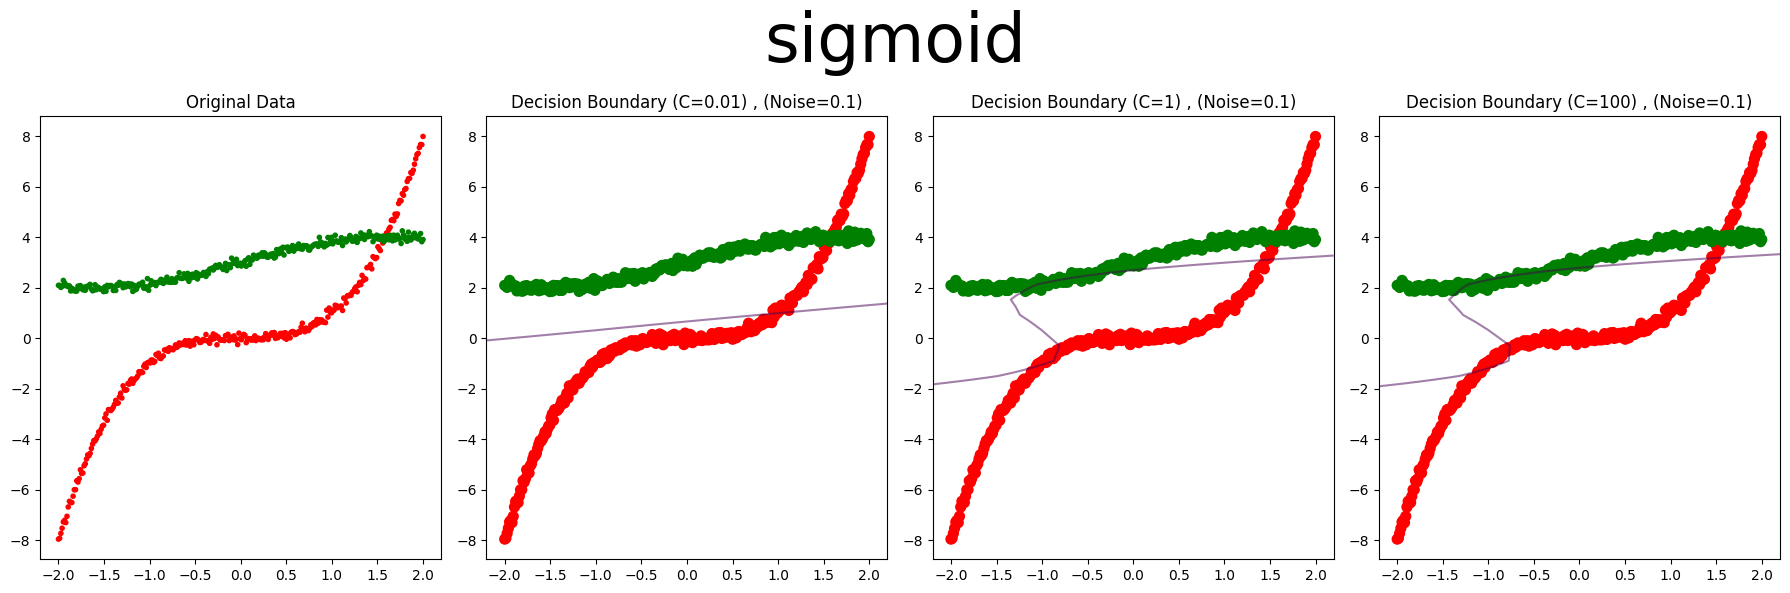

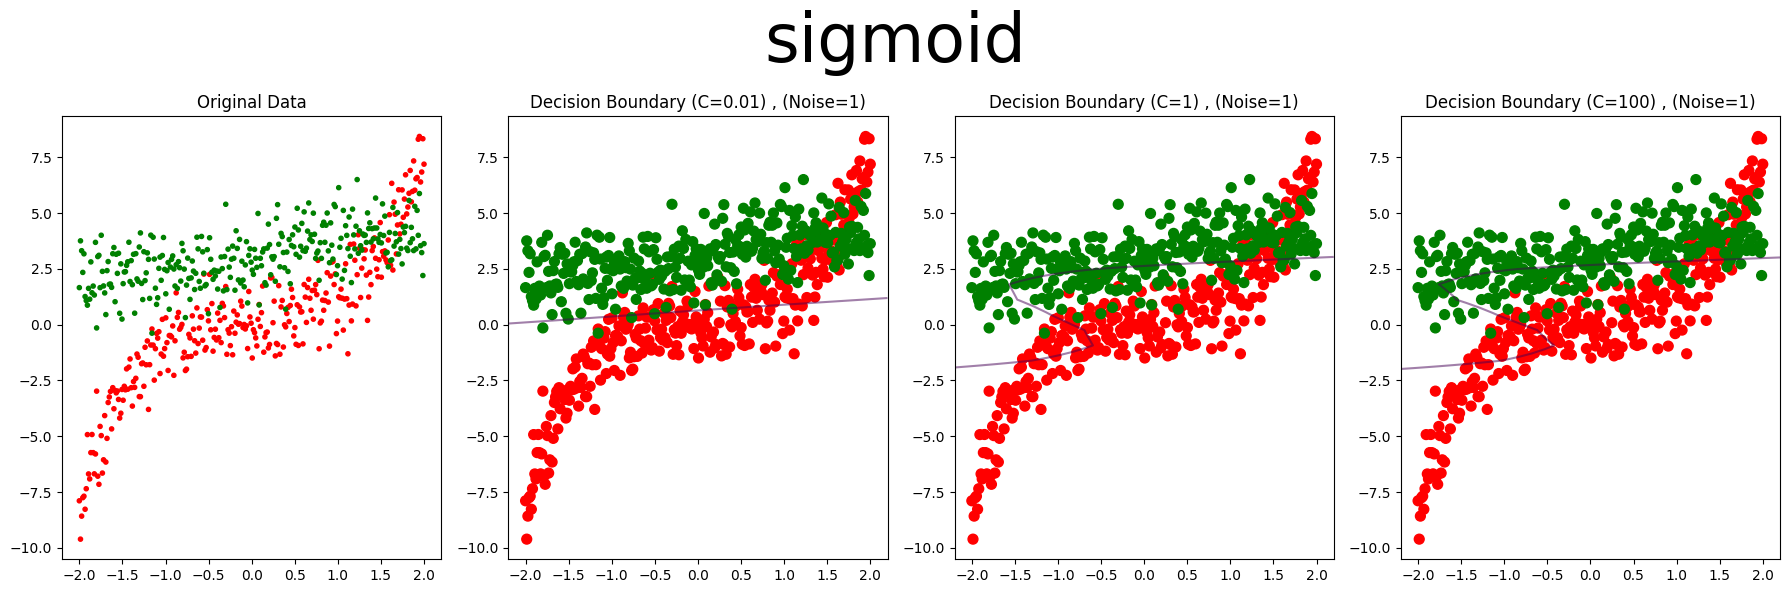

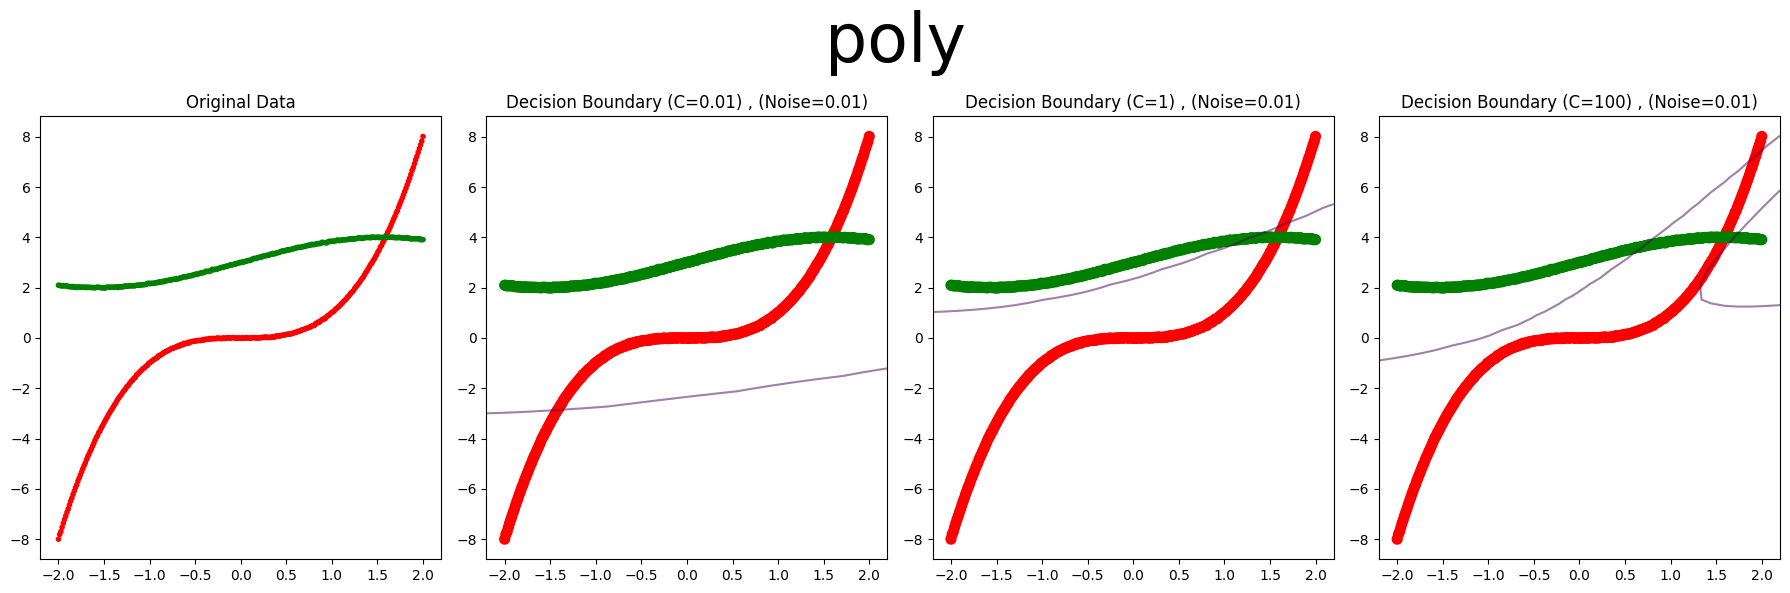

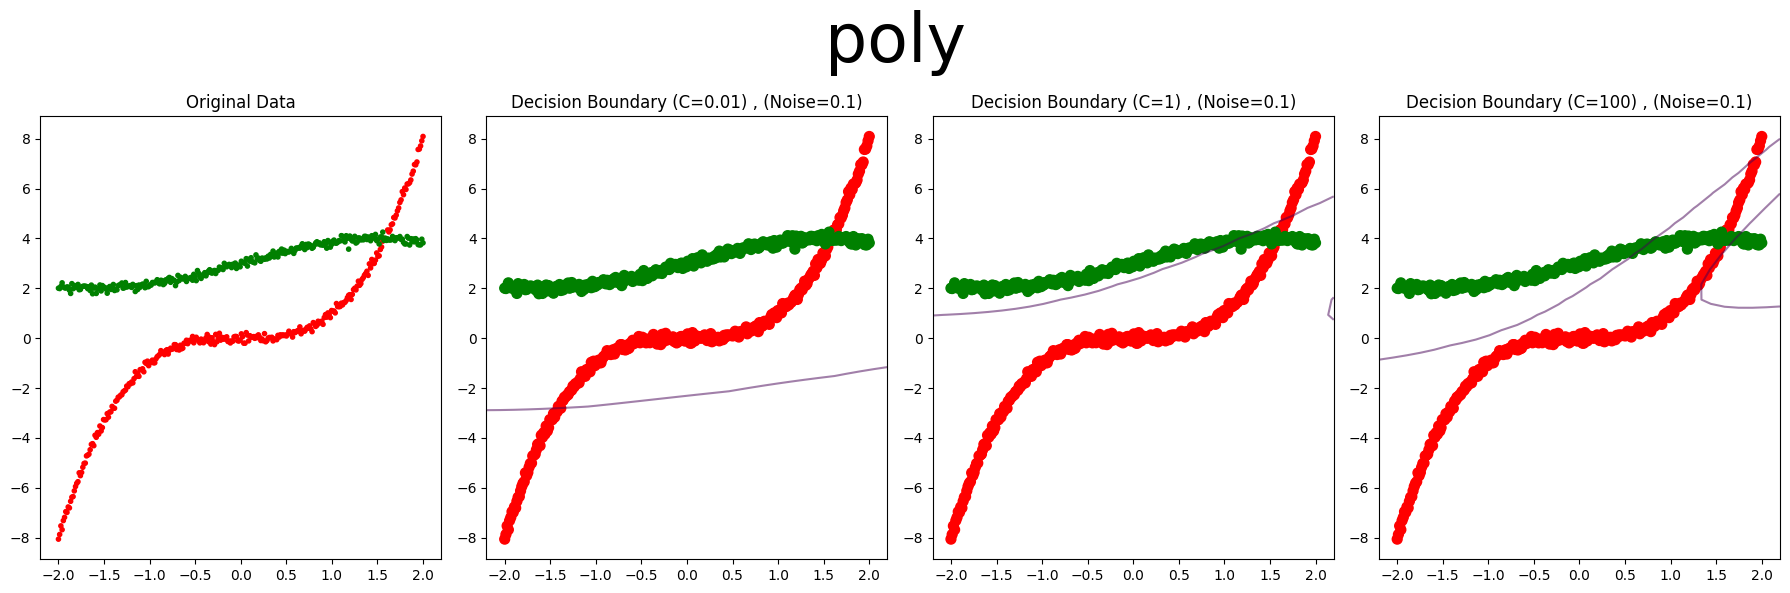

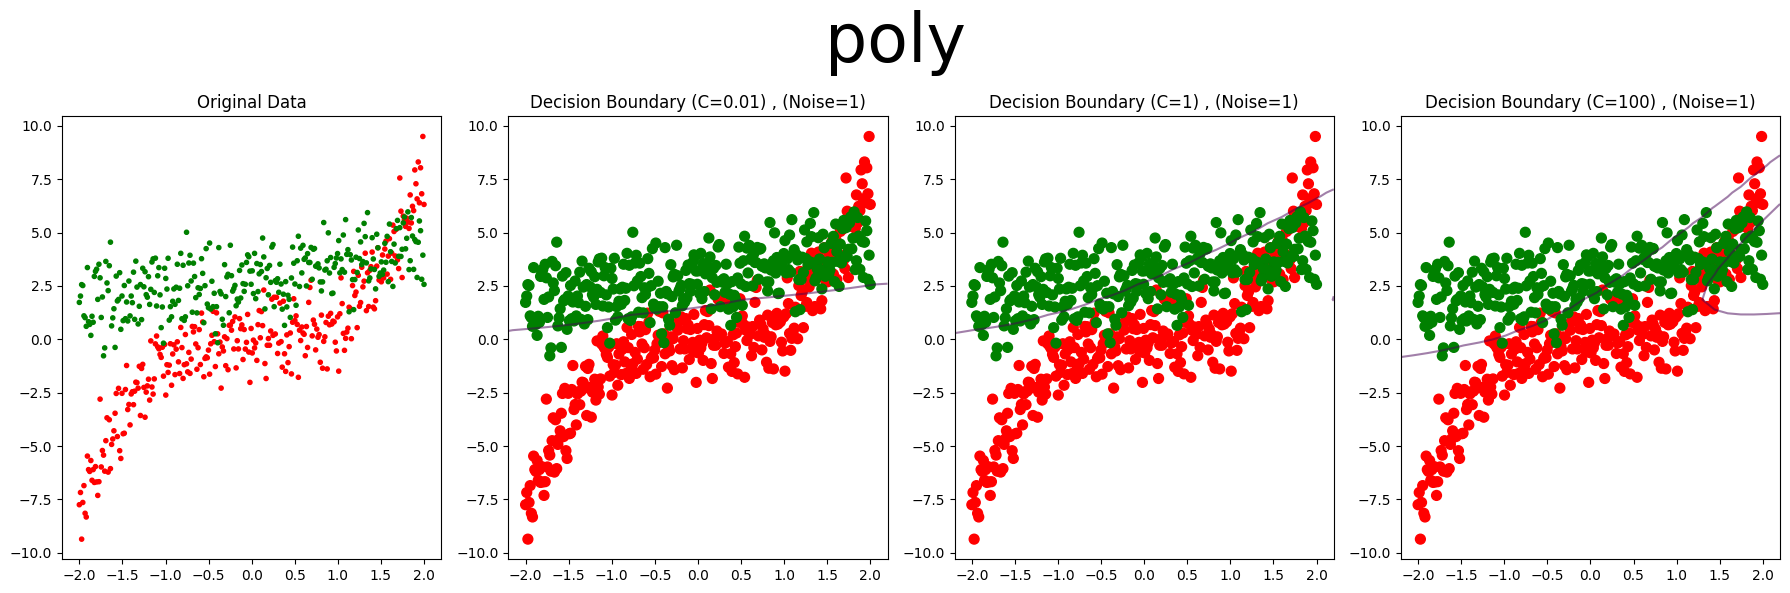

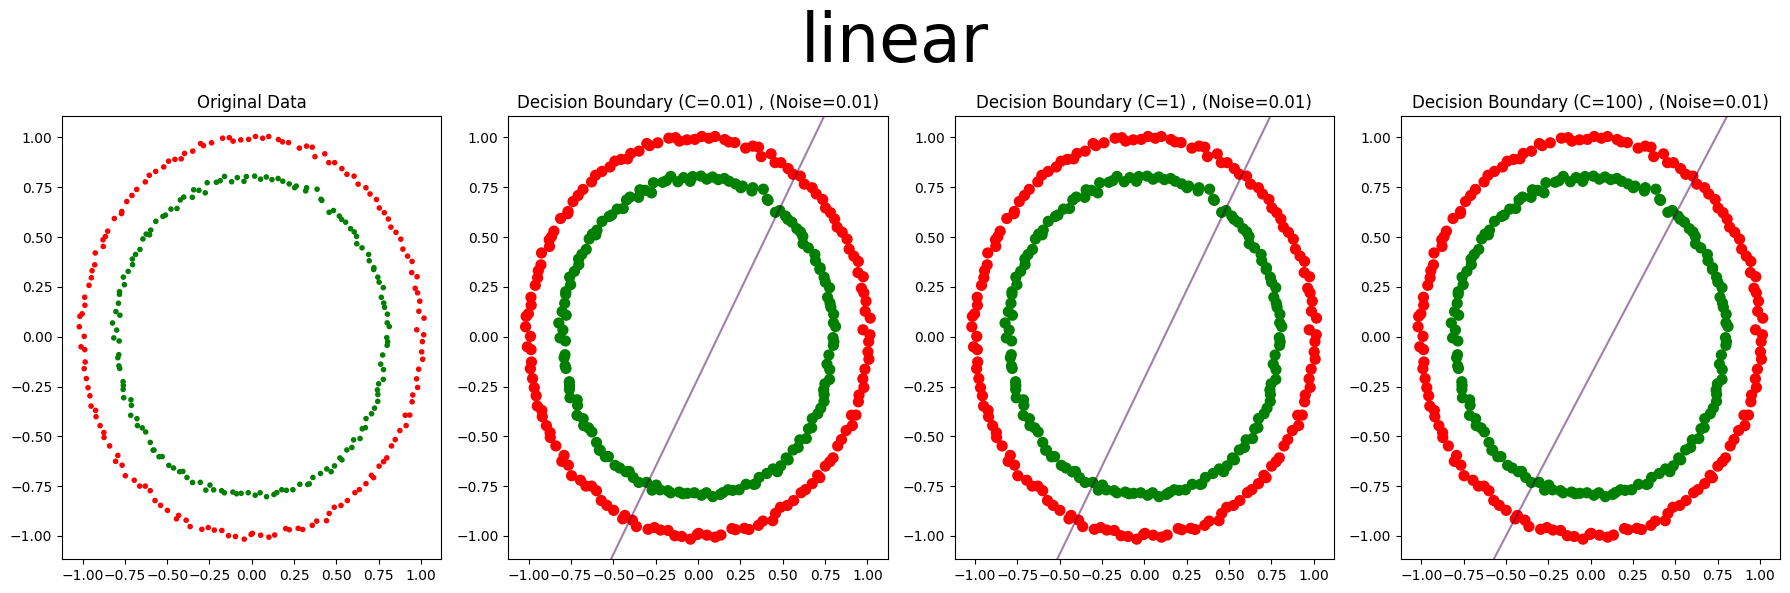

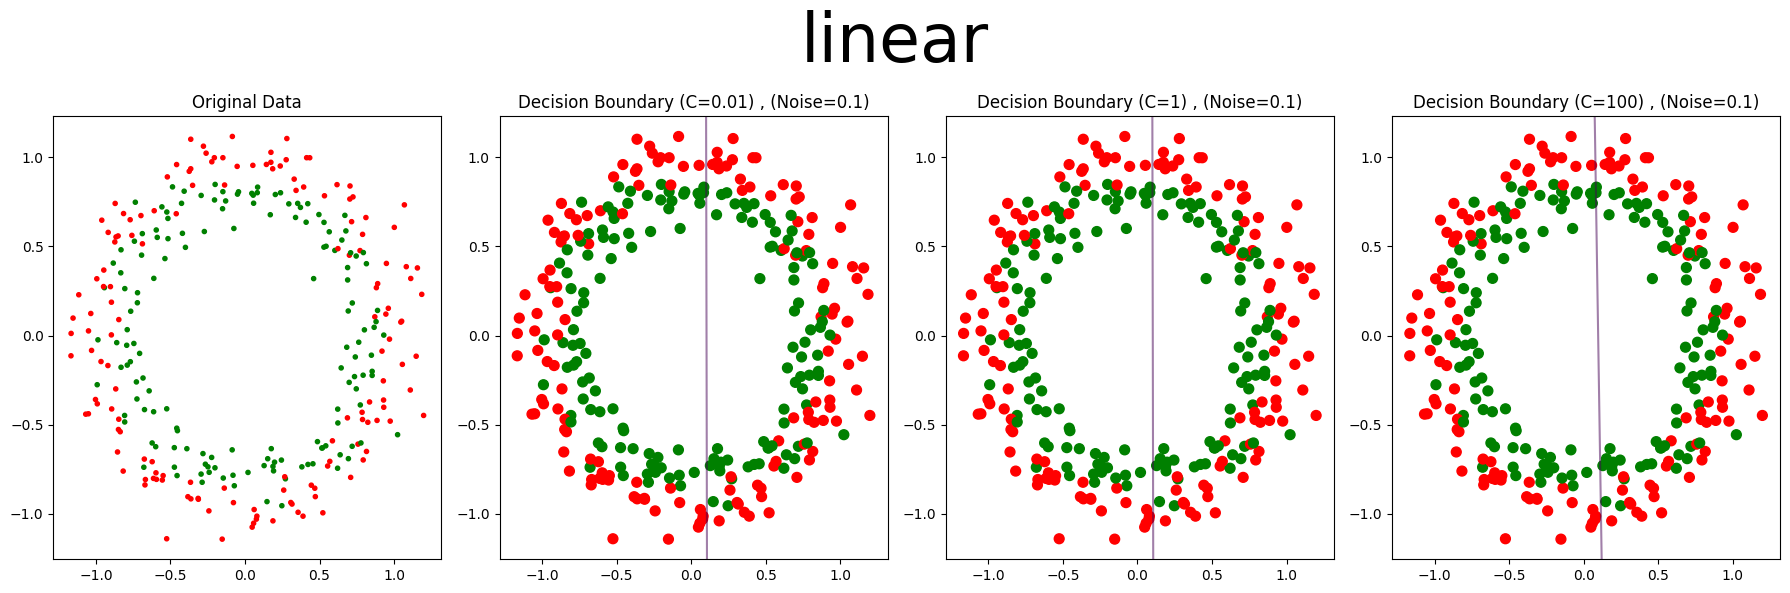

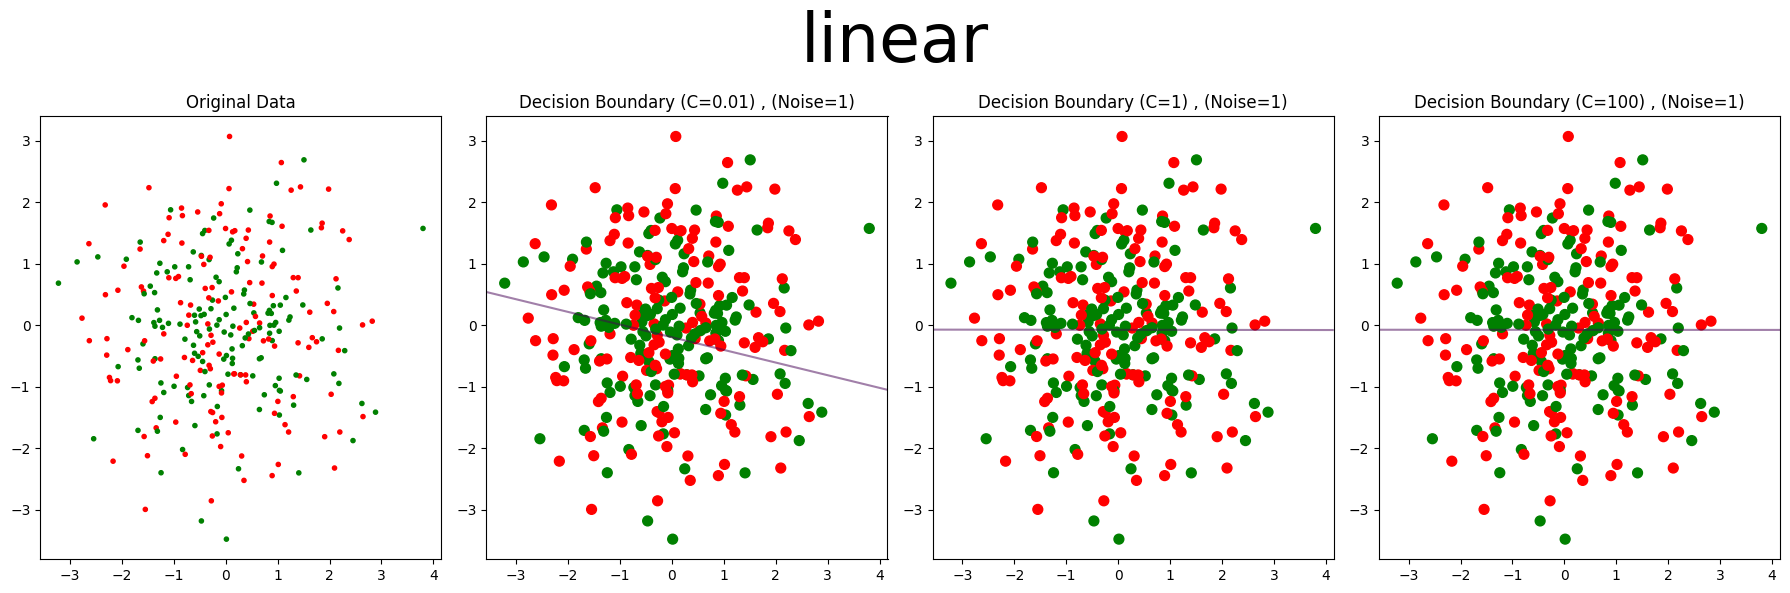

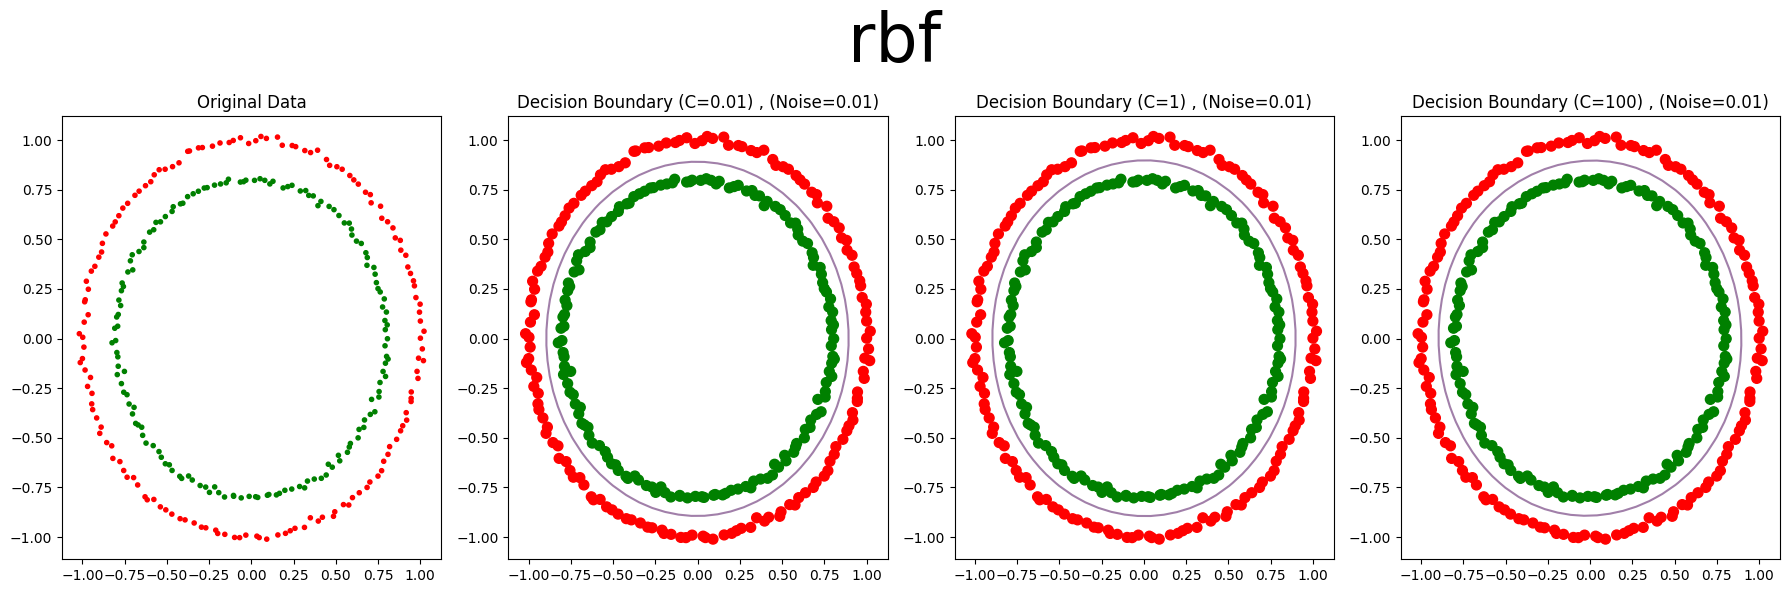

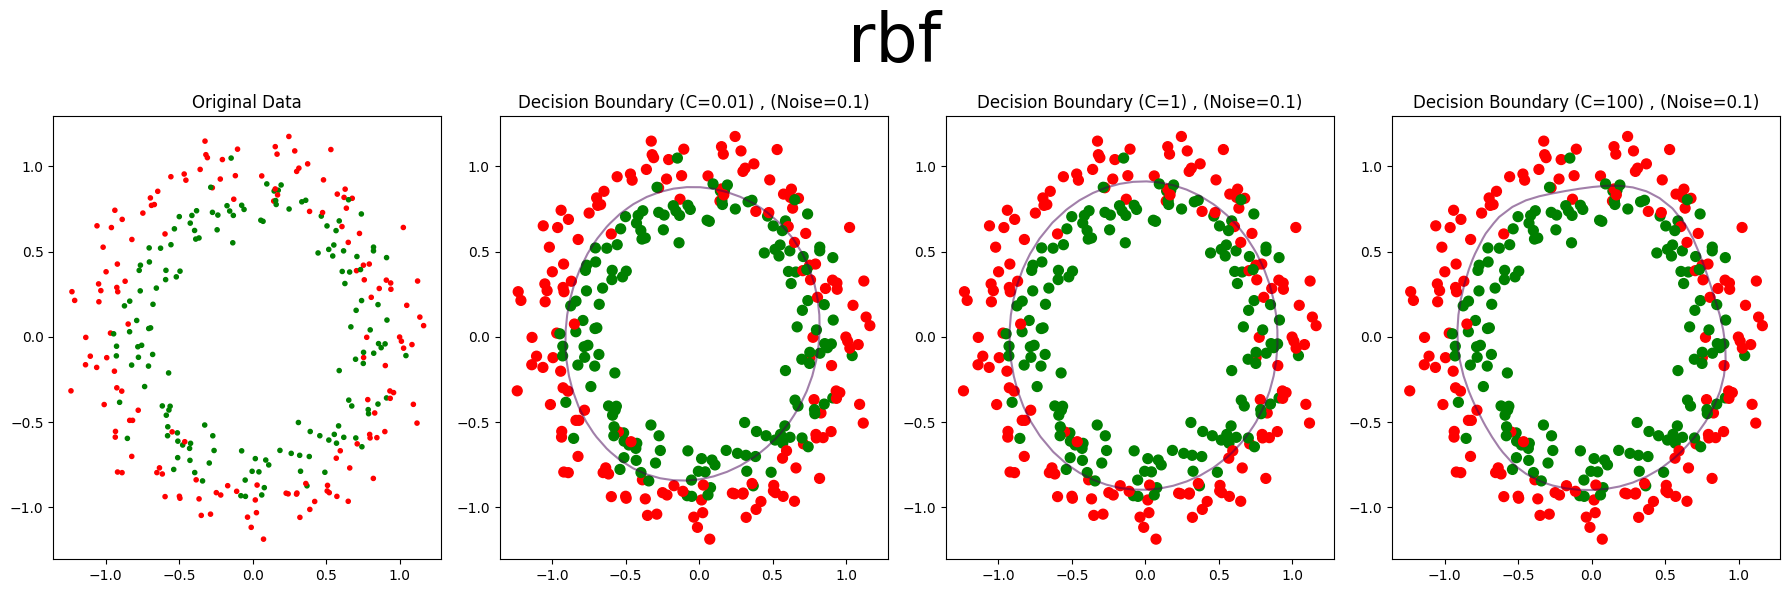

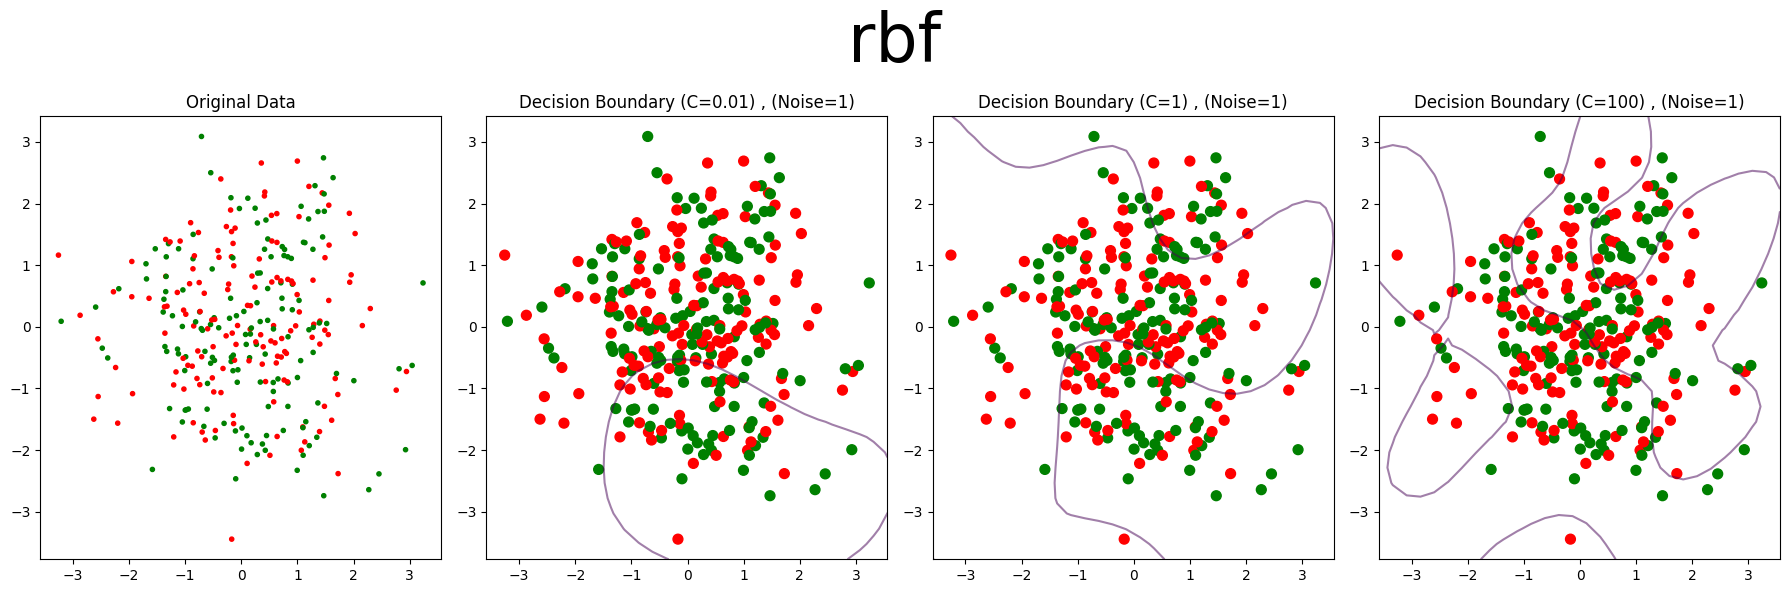

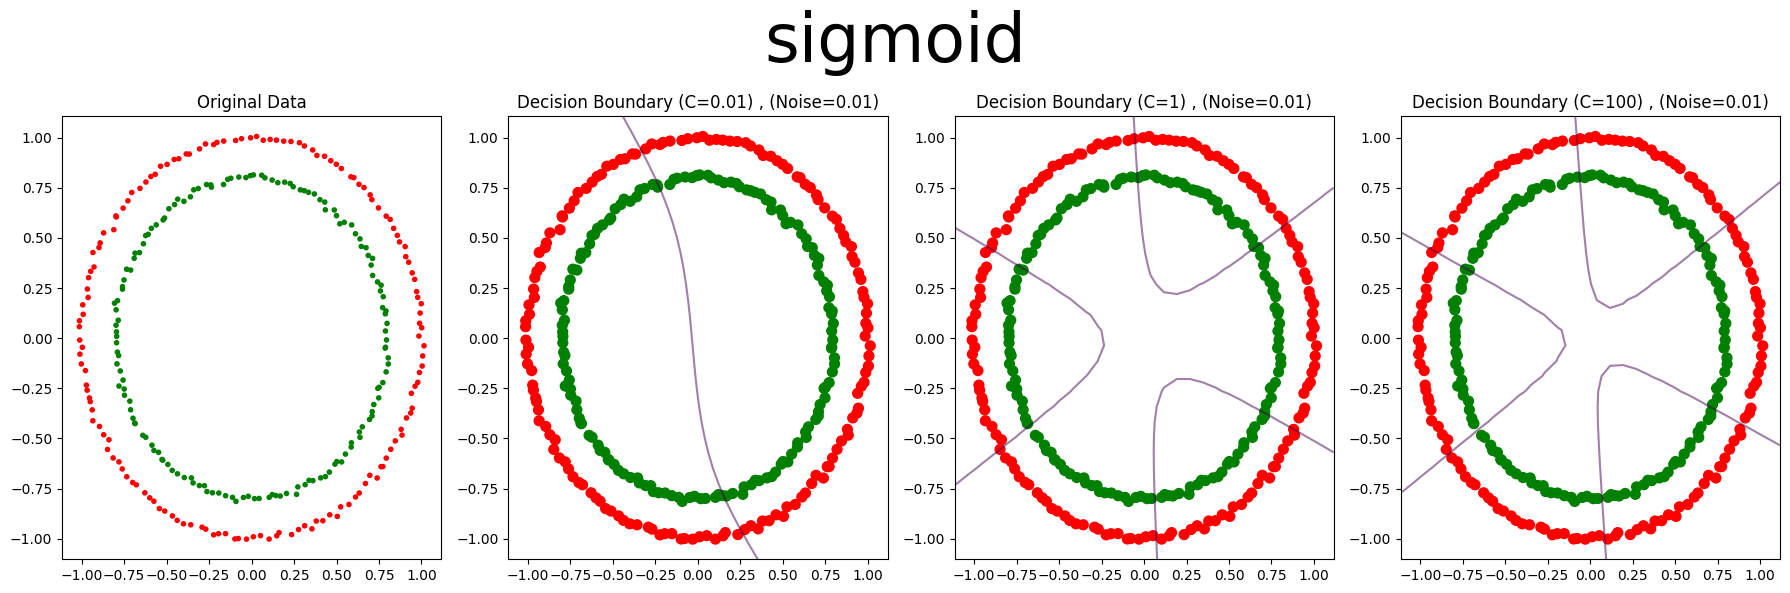

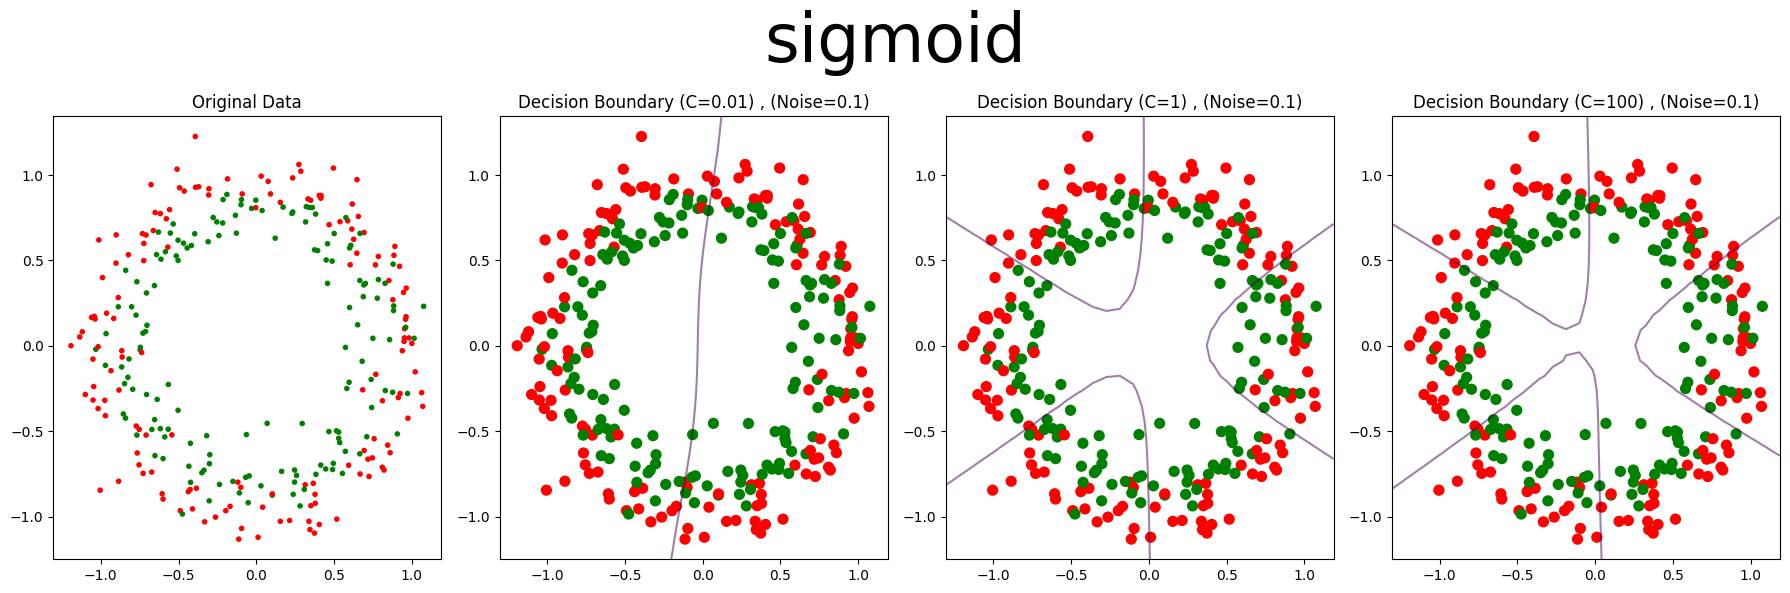

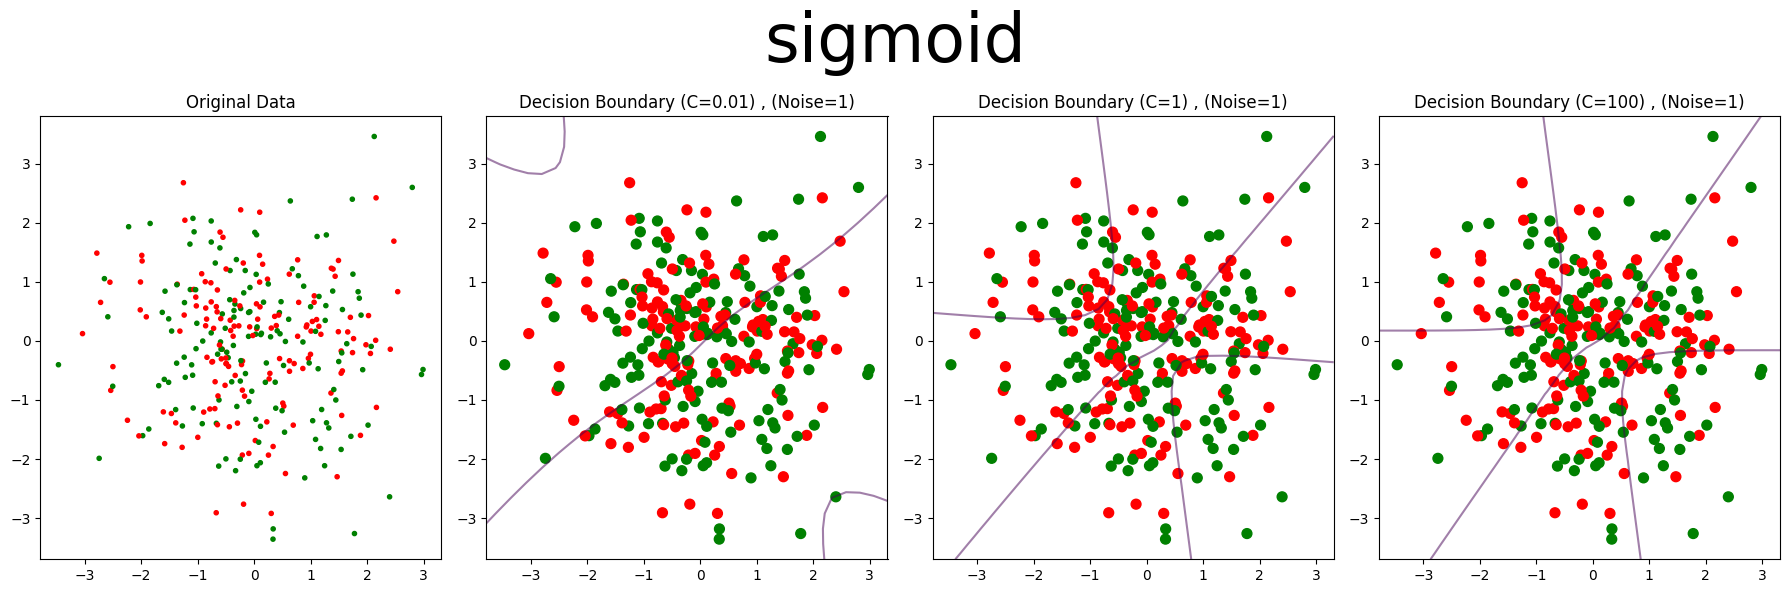

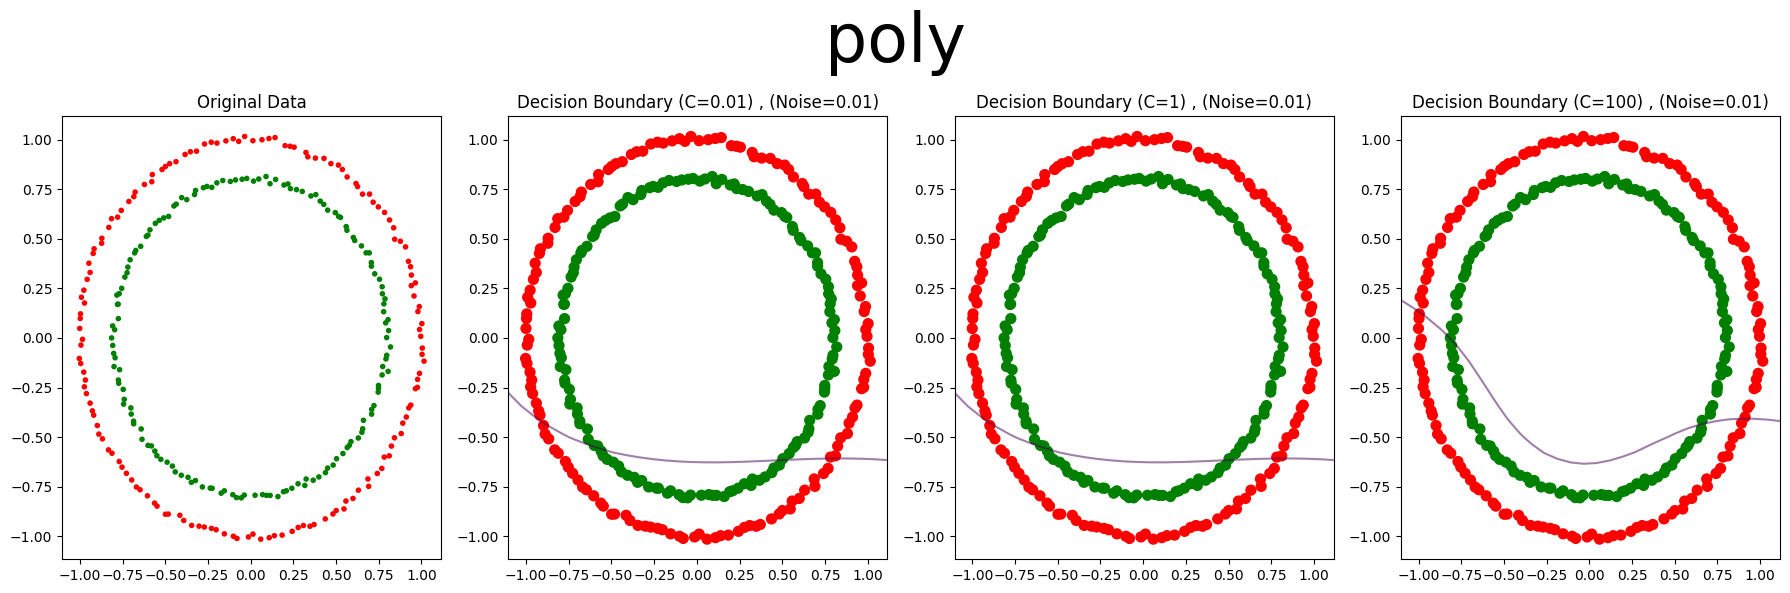

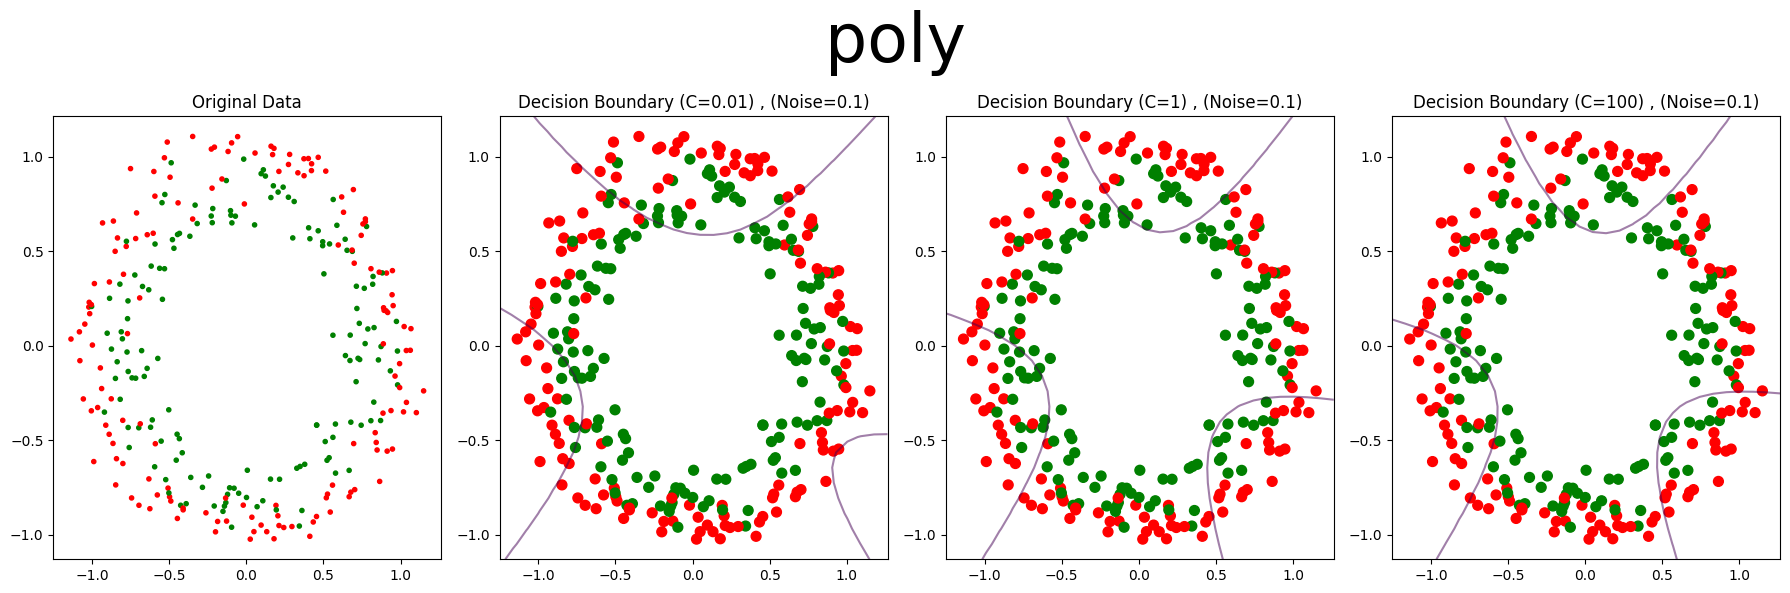

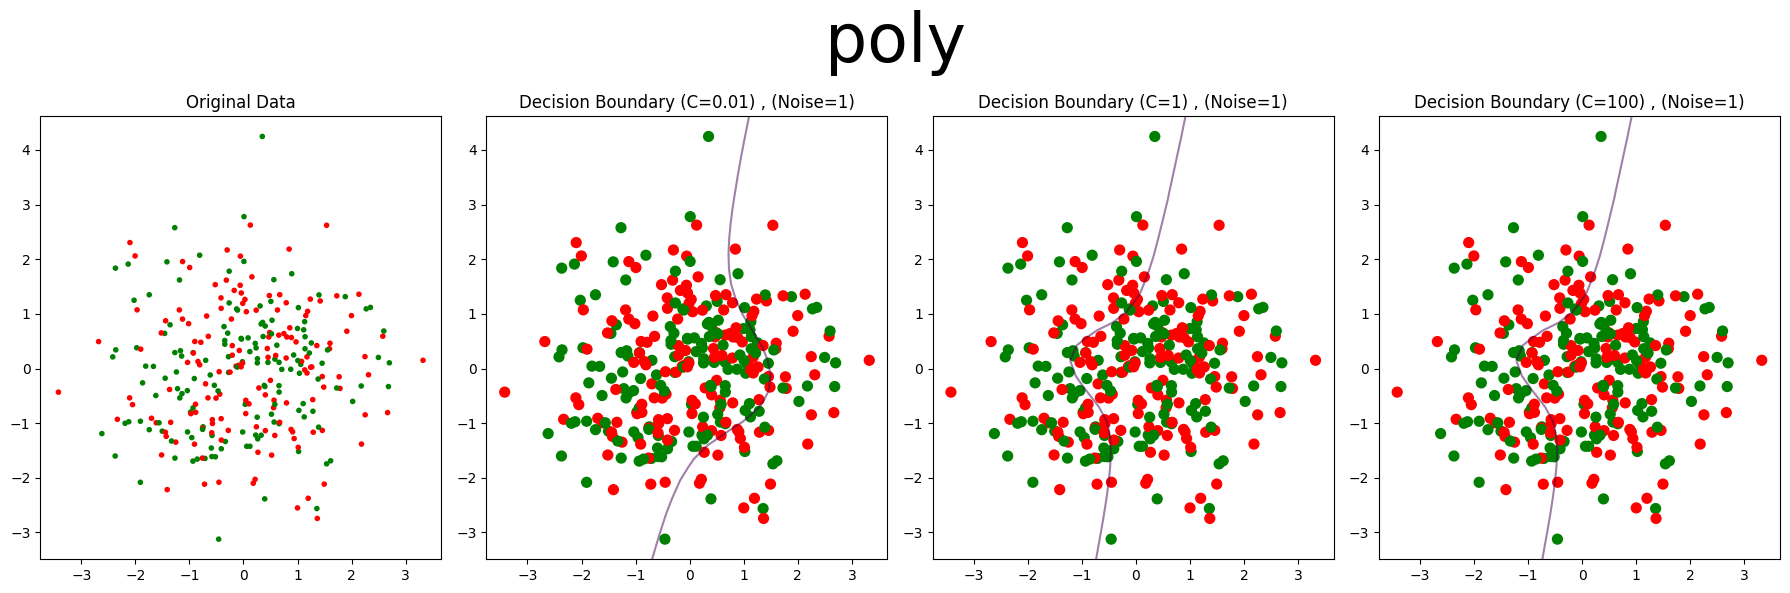

In [103]:
for name in ['linear','rbf','sigmoid','poly']:
    for noise in [0.01 , 0.1 , 1]:
        non_linear_model2(name , 300 , noise)

for name in ['linear','rbf','sigmoid','poly']:
    for noise in [0.01 , 0.1 , 1]:
        non_linear_model3(name , 300 , noise)

for name in ['linear','rbf','sigmoid','poly']:
    for noise in [0.01 , 0.1 , 1]:
        non_linear_model(name , 300 , noise)